In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [2]:
df=pd.read_csv("train.csv")

In [3]:
df.head()

Id         groupId         matchId  assists  boosts  \
0  2a718802964d4d  c1827980642b62  9a78c7efc2795b        0       1   
1  a4ea8117a0d762  85ed9d49426dcc  0b08d1f70bc0e4        0       0   
2  abad453008c6f9  30338d07f9de75  2ae027da487bb2        1       0   
3  fba3f5b8dfccc4  206f8c8edfb9a2  a7ea160d40e9f1        2       2   
4  6892c6f3ea7930  2f573dbd371da9  c84a9837c833c7        0       0   

   damageDealt  DBNOs  headshotKills  heals  killPlace  ...  revives  \
0        23.54      0              0      1         47  ...        0   
1        46.04      0              0      0         58  ...        0   
2        51.60      0              0      0         62  ...        0   
3       165.20      0              0      1         50  ...        0   
4        14.69      0              0      0         37  ...        0   

   rideDistance  roadKills  swimDistance  teamKills vehicleDestroys  \
0           0.0          0          0.00          0               0   
1           0.0          0          0.00          0               0   
2           0.0          0          0.00          0               0   
3           0.0          0         48.32          0               0   
4        5218.0          0          0.00          0               0   

   walkDistance  weaponsAcquired  winPoints  winPlacePerc  
0        2600.0                5       1485        0.7143  
1         239.0                1       1555        0.3500  
2        1589.0                4       1441        0.5556  
3        3180.0                8          0        0.7778  
4        1687.0                3       1500        0.4000  

[5 rows x 29 columns]

In [4]:
df.describe()

assists        boosts   damageDealt         DBNOs  headshotKills  \
count  3.112876e+06  3.112876e+06  3.112876e+06  3.112876e+06   3.112876e+06   
mean   2.339239e-01  1.107759e+00  1.308017e+02  6.587818e-01   2.268834e-01   
std    5.887983e-01  1.716308e+00  1.707582e+02  1.146708e+00   6.026371e-01   
min    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   0.000000e+00   
25%    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   0.000000e+00   
50%    0.000000e+00  0.000000e+00  8.435000e+01  0.000000e+00   0.000000e+00   
75%    0.000000e+00  2.000000e+00  1.862000e+02  1.000000e+00   0.000000e+00   
max    2.200000e+01  3.300000e+01  6.616000e+03  5.300000e+01   6.400000e+01   

              heals     killPlace    killPoints         kills   killStreaks  \
count  3.112876e+06  3.112876e+06  3.112876e+06  3.112876e+06  3.112876e+06   
mean   1.370783e+00  4.758207e+01  5.050118e+02  9.252460e-01  5.442054e-01   
std    2.679204e+00  2.746282e+01  6.275414e+02  1.558777e+00  7.111749e-01   
min    0.000000e+00  1.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%    0.000000e+00  2.400000e+01  0.000000e+00  0.000000e+00  0.000000e+00   
50%    0.000000e+00  4.700000e+01  0.000000e+00  0.000000e+00  0.000000e+00   
75%    2.000000e+00  7.100000e+01  1.171000e+03  1.000000e+00  1.000000e+00   
max    8.000000e+01  1.000000e+02  2.170000e+03  7.200000e+01  2.000000e+01   

       ...       revives  rideDistance     roadKills  swimDistance  \
count  ...  3.112876e+06  3.112876e+06  3.112876e+06  3.112876e+06   
mean   ...  1.648183e-01  6.069331e+02  3.505119e-03  4.531070e+00   
std    ...  4.720282e-01  1.500459e+03  7.387977e-02  3.060910e+01   
min    ...  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%    ...  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
50%    ...  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
75%    ...  0.000000e+00  3.818250e-01  0.000000e+00  0.000000e+00   
max    ...  3.900000e+01  4.071000e+04  1.800000e+01  2.718000e+03   

          teamKills  vehicleDestroys  walkDistance  weaponsAcquired  \
count  3.112876e+06     3.112876e+06  3.112876e+06     3.112876e+06   
mean   2.380917e-02     7.908442e-03  1.154895e+03     3.662081e+00   
std    1.672109e-01     9.265749e-02  1.183496e+03     2.459287e+00   
min    0.000000e+00     0.000000e+00  0.000000e+00     0.000000e+00   
25%    0.000000e+00     0.000000e+00  1.553000e+02     2.000000e+00   
50%    0.000000e+00     0.000000e+00  6.867000e+02     3.000000e+00   
75%    0.000000e+00     0.000000e+00  1.978000e+03     5.000000e+00   
max    1.000000e+01     5.000000e+00  2.578000e+04     2.360000e+02   

          winPoints  winPlacePerc  
count  3.112876e+06  3.112875e+06  
mean   6.064482e+02  4.730654e-01  
std    7.397138e+02  3.074168e-01  
min    0.000000e+00  0.000000e+00  
25%    0.000000e+00  2.000000e-01  
50%    0.000000e+00  4.583000e-01  
75%    1.495000e+03  7.407000e-01  
max    2.001000e+03  1.000000e+00  

[8 rows x 25 columns]

In [5]:
print(df["killPoints"].mean())
print(df["winPoints"].mean())
print(df["rankPoints"].mean())

505.0118058027368
606.4481678679138
892.0587761928198


In [6]:
df.isna().sum()

Id                 0
groupId            0
matchId            0
assists            0
boosts             0
damageDealt        0
DBNOs              0
headshotKills      0
heals              0
killPlace          0
killPoints         0
kills              0
killStreaks        0
longestKill        0
matchDuration      0
matchType          0
maxPlace           0
numGroups          0
rankPoints         0
revives            0
rideDistance       0
roadKills          0
swimDistance       0
teamKills          0
vehicleDestroys    0
walkDistance       0
weaponsAcquired    0
winPoints          0
winPlacePerc       1
dtype: int64

In [7]:
df.drop(axis="rows",labels=df.index[df["winPlacePerc"].isna()],inplace=True)

In [8]:
df.isna().sum()

Id                 0
groupId            0
matchId            0
assists            0
boosts             0
damageDealt        0
DBNOs              0
headshotKills      0
heals              0
killPlace          0
killPoints         0
kills              0
killStreaks        0
longestKill        0
matchDuration      0
matchType          0
maxPlace           0
numGroups          0
rankPoints         0
revives            0
rideDistance       0
roadKills          0
swimDistance       0
teamKills          0
vehicleDestroys    0
walkDistance       0
weaponsAcquired    0
winPoints          0
winPlacePerc       0
dtype: int64

In [9]:
df

Id         groupId         matchId  assists  boosts  \
0        2a718802964d4d  c1827980642b62  9a78c7efc2795b        0       1   
1        a4ea8117a0d762  85ed9d49426dcc  0b08d1f70bc0e4        0       0   
2        abad453008c6f9  30338d07f9de75  2ae027da487bb2        1       0   
3        fba3f5b8dfccc4  206f8c8edfb9a2  a7ea160d40e9f1        2       2   
4        6892c6f3ea7930  2f573dbd371da9  c84a9837c833c7        0       0   
...                 ...             ...             ...      ...     ...   
3112871  9ead1df8f955d9  6cfd7699a9e60c  03b2aaf71899dd        0       0   
3112872  82acea6cb048f0  9895b84ebc64b6  873b1d714c226c        0       1   
3112873  01e620d3704627  42f7b571904f80  add3b3fb4bfa0a        2       0   
3112874  b1790bed0f85ff  bafd20803d881e  d3396343532c1c        1       0   
3112875  79a6cac5eb5741  d5b693a6dc9bd6  9de4e3acb466c4        0       1   

         damageDealt  DBNOs  headshotKills  heals  killPlace  ...  revives  \
0              23.54      0              0      1         47  ...        0   
1              46.04      0              0      0         58  ...        0   
2              51.60      0              0      0         62  ...        0   
3             165.20      0              0      1         50  ...        0   
4              14.69      0              0      0         37  ...        0   
...              ...    ...            ...    ...        ...  ...      ...   
3112871         0.00      0              0      0         55  ...        0   
3112872        43.00      0              0      1         49  ...        0   
3112873       191.80      3              0      1         26  ...        0   
3112874       243.00      2              0      1         20  ...        0   
3112875       192.50      0              0      1         53  ...        0   

         rideDistance  roadKills  swimDistance  teamKills vehicleDestroys  \
0                 0.0          0          0.00          0               0   
1                 0.0          0          0.00          0               0   
2                 0.0          0          0.00          0               0   
3                 0.0          0         48.32          0               0   
4              5218.0          0          0.00          0               0   
...               ...        ...           ...        ...             ...   
3112871           0.0          0          0.00          0               0   
3112872           0.0          0          0.00          0               0   
3112873           0.0          0          0.00          0               0   
3112874           0.0          0          0.00          0               0   
3112875           0.0          0          0.00          0               0   

         walkDistance  weaponsAcquired  winPoints  winPlacePerc  
0             2600.00                5       1485        0.7143  
1              239.00                1       1555        0.3500  
2             1589.00                4       1441        0.5556  
3             3180.00                8          0        0.7778  
4             1687.00                3       1500        0.4000  
...               ...              ...        ...           ...  
3112871         29.34                1          0        0.4286  
3112872       2264.00                4          0        0.7708  
3112873       3585.00                6          0        0.8889  
3112874        132.80                2       1418        0.2083  
3112875       2277.00                7       1437        0.7083  

[3112875 rows x 29 columns]

In [10]:
df.loc[df.rankPoints>-1]

Id         groupId         matchId  assists  boosts  \
0        2a718802964d4d  c1827980642b62  9a78c7efc2795b        0       1   
3        fba3f5b8dfccc4  206f8c8edfb9a2  a7ea160d40e9f1        2       2   
5        3f14a193701938  dc4b985c79b14f  13da7f4d5a297e        0       0   
6        17af85e8ac803a  0a1025b9b3fd62  82c647abcb5914        0       0   
11       b2034974a5eae6  7f8a0ffe7b3f46  50399b262cc969        0       0   
...                 ...             ...             ...      ...     ...   
3112869  332b8b47ab6706  bb8e68de5af2b8  32adad38f7cc1d        2       0   
3112870  40f16c77aadf73  c338bb531d14ca  529258cd9269e1        0       0   
3112871  9ead1df8f955d9  6cfd7699a9e60c  03b2aaf71899dd        0       0   
3112872  82acea6cb048f0  9895b84ebc64b6  873b1d714c226c        0       1   
3112873  01e620d3704627  42f7b571904f80  add3b3fb4bfa0a        2       0   

         damageDealt  DBNOs  headshotKills  heals  killPlace  ...  revives  \
0              23.54      0              0      1         47  ...        0   
3             165.20      0              0      1         50  ...        0   
5              42.11      0              0      0         68  ...        0   
6              58.86      0              0      0         86  ...        0   
11              0.00      0              0      0         97  ...        0   
...              ...    ...            ...    ...        ...  ...      ...   
3112869        77.43      0              0      0         75  ...        0   
3112870         0.00      0              0      0         69  ...        0   
3112871         0.00      0              0      0         55  ...        0   
3112872        43.00      0              0      1         49  ...        0   
3112873       191.80      3              0      1         26  ...        0   

         rideDistance  roadKills  swimDistance  teamKills vehicleDestroys  \
0                 0.0          0          0.00          0               0   
3                 0.0          0         48.32          0               0   
5                 0.0          0          0.00          0               0   
6                 0.0          0          0.00          0               0   
11                0.0          0          0.00          0               0   
...               ...        ...           ...        ...             ...   
3112869           0.0          0          0.00          0               0   
3112870           0.0          0          0.00          0               0   
3112871           0.0          0          0.00          0               0   
3112872           0.0          0          0.00          0               0   
3112873           0.0          0          0.00          0               0   

         walkDistance  weaponsAcquired  winPoints  winPlacePerc  
0             2600.00                5       1485        0.7143  
3             3180.00                8          0        0.7778  
5              152.40                2          0        0.2857  
6              191.10                0       1504        0.0714  
11              20.38                1          0        0.0000  
...               ...              ...        ...           ...  
3112869        146.20                1          0        0.2917  
3112870        241.40                4          0        0.3125  
3112871         29.34                1          0        0.4286  
3112872       2264.00                4          0        0.7708  
3112873       3585.00                6          0        0.8889  

[1921646 rows x 29 columns]

In [11]:
df.loc[df["rankPoints"]==-1,"rankPoints"]=np.nan
df.loc[((df["rankPoints"]!=-1) & (df["killPoints"]==0)),"killPoints"]=np.nan
df.loc[((df["rankPoints"]!=-1) & (df["winPoints"]==0)),"winPoints"]=np.nan

In [12]:
df.isna().sum()

Id                       0
groupId                  0
matchId                  0
assists                  0
boosts                   0
damageDealt              0
DBNOs                    0
headshotKills            0
heals                    0
killPlace                0
killPoints         1859016
kills                    0
killStreaks              0
longestKill              0
matchDuration            0
matchType                0
maxPlace                 0
numGroups                0
rankPoints         1191229
revives                  0
rideDistance             0
roadKills                0
swimDistance             0
teamKills                0
vehicleDestroys          0
walkDistance             0
weaponsAcquired          0
winPoints          1859016
winPlacePerc             0
dtype: int64

In [13]:
print(df["killPoints"].mean())
print(df["winPoints"].mean())
print(df["rankPoints"].mean())

1253.760693985528
1505.5902992282226
1445.6658562503187


In [14]:
df.loc[df["killPoints"].isna(),"killPoints"]=df["killPoints"].mean()
df.loc[df["winPoints"].isna(),"winPoints"]=df["winPoints"].mean()
df.loc[df["rankPoints"].isna(),"rankPoints"]=df["rankPoints"].mean()

In [15]:
testdf=df

In [16]:
df.nunique()

Id                 3112875
groupId            1721143
matchId              47964
assists                 19
boosts                  27
damageDealt          28382
DBNOs                   37
headshotKills           33
heals                   59
killPlace              100
killPoints            1647
kills                   56
killStreaks             18
longestKill          27241
matchDuration         1266
matchType               16
maxPlace                99
numGroups              100
rankPoints            2103
revives                 23
rideDistance         31169
roadKills               14
swimDistance         26609
teamKills                9
vehicleDestroys          6
walkDistance         37096
weaponsAcquired         91
winPoints             1386
winPlacePerc          2943
dtype: int64

In [17]:
df["matchType"].unique()

array(['squad-fpp', 'duo-fpp', 'normal-squad-fpp', 'squad', 'solo-fpp',
       'duo', 'solo', 'normal-duo-fpp', 'flaretpp', 'crashtpp',
       'normal-solo', 'crashfpp', 'normal-squad', 'normal-solo-fpp',
       'normal-duo', 'flarefpp'], dtype=object)

In [18]:
lbl_encodr=LabelEncoder()
new_type=lbl_encodr.fit_transform(df["matchType"])
new_type

array([15,  3, 15, ..., 15,  3,  3])

In [19]:
df["matchType"]

0                 squad-fpp
1                   duo-fpp
2                 squad-fpp
3                 squad-fpp
4          normal-squad-fpp
                 ...       
3112871           squad-fpp
3112872             duo-fpp
3112873           squad-fpp
3112874             duo-fpp
3112875             duo-fpp
Name: matchType, Length: 3112875, dtype: object

In [20]:
df["matchType"]=new_type
df["matchType"].head()

0    15
1     3
2    15
3    15
4    11
Name: matchType, dtype: int64

In [21]:
new_type=lbl_encodr.fit_transform(df["groupId"])
new_type

array([1301253,  902286,  324684, ...,  451653, 1257585, 1436876])

In [22]:
df["groupId"]=new_type
df.head()

Id  groupId         matchId  assists  boosts  damageDealt  \
0  2a718802964d4d  1301253  9a78c7efc2795b        0       1        23.54   
1  a4ea8117a0d762   902286  0b08d1f70bc0e4        0       0        46.04   
2  abad453008c6f9   324684  2ae027da487bb2        1       0        51.60   
3  fba3f5b8dfccc4   218395  a7ea160d40e9f1        2       2       165.20   
4  6892c6f3ea7930   318809  c84a9837c833c7        0       0        14.69   

   DBNOs  headshotKills  heals  killPlace  ...  revives  rideDistance  \
0      0              0      1         47  ...        0           0.0   
1      0              0      0         58  ...        0           0.0   
2      0              0      0         62  ...        0           0.0   
3      0              0      1         50  ...        0           0.0   
4      0              0      0         37  ...        0        5218.0   

   roadKills  swimDistance  teamKills  vehicleDestroys  walkDistance  \
0          0          0.00          0                0        2600.0   
1          0          0.00          0                0         239.0   
2          0          0.00          0                0        1589.0   
3          0         48.32          0                0        3180.0   
4          0          0.00          0                0        1687.0   

   weaponsAcquired    winPoints  winPlacePerc  
0                5  1485.000000        0.7143  
1                1  1555.000000        0.3500  
2                4  1441.000000        0.5556  
3                8  1505.590299        0.7778  
4                3  1500.000000        0.4000  

[5 rows x 29 columns]

In [23]:
new_type=lbl_encodr.fit_transform(df["matchId"])
df["matchId"]=new_type
df.head()

Id  groupId  matchId  assists  boosts  damageDealt  DBNOs  \
0  2a718802964d4d  1301253    28867        0       1        23.54      0   
1  a4ea8117a0d762   902286     2030        0       0        46.04      0   
2  abad453008c6f9   324684     8011        1       0        51.60      0   
3  fba3f5b8dfccc4   218395    31407        2       2       165.20      0   
4  6892c6f3ea7930   318809    37438        0       0        14.69      0   

   headshotKills  heals  killPlace  ...  revives  rideDistance  roadKills  \
0              0      1         47  ...        0           0.0          0   
1              0      0         58  ...        0           0.0          0   
2              0      0         62  ...        0           0.0          0   
3              0      1         50  ...        0           0.0          0   
4              0      0         37  ...        0        5218.0          0   

   swimDistance  teamKills  vehicleDestroys  walkDistance  weaponsAcquired  \
0          0.00          0                0        2600.0                5   
1          0.00          0                0         239.0                1   
2          0.00          0                0        1589.0                4   
3         48.32          0                0        3180.0                8   
4          0.00          0                0        1687.0                3   

     winPoints  winPlacePerc  
0  1485.000000        0.7143  
1  1555.000000        0.3500  
2  1441.000000        0.5556  
3  1505.590299        0.7778  
4  1500.000000        0.4000  

[5 rows x 29 columns]

In [24]:
new_type=lbl_encodr.fit_transform(df["Id"])
df["Id"]=new_type
df.head()

Id  groupId  matchId  assists  boosts  damageDealt  DBNOs  \
0   515694  1301253    28867        0       1        23.54      0   
1  2005698   902286     2030        0       0        46.04      0   
2  2087974   324684     8011        1       0        51.60      0   
3  3059764   218395    31407        2       2       165.20      0   
4  1273299   318809    37438        0       0        14.69      0   

   headshotKills  heals  killPlace  ...  revives  rideDistance  roadKills  \
0              0      1         47  ...        0           0.0          0   
1              0      0         58  ...        0           0.0          0   
2              0      0         62  ...        0           0.0          0   
3              0      1         50  ...        0           0.0          0   
4              0      0         37  ...        0        5218.0          0   

   swimDistance  teamKills  vehicleDestroys  walkDistance  weaponsAcquired  \
0          0.00          0                0        2600.0                5   
1          0.00          0                0         239.0                1   
2          0.00          0                0        1589.0                4   
3         48.32          0                0        3180.0                8   
4          0.00          0                0        1687.0                3   

     winPoints  winPlacePerc  
0  1485.000000        0.7143  
1  1555.000000        0.3500  
2  1441.000000        0.5556  
3  1505.590299        0.7778  
4  1500.000000        0.4000  

[5 rows x 29 columns]

In [25]:
df.index[df.duplicated()]

Int64Index([], dtype='int64')

In [26]:
df.columns

Index(['Id', 'groupId', 'matchId', 'assists', 'boosts', 'damageDealt', 'DBNOs',
       'headshotKills', 'heals', 'killPlace', 'killPoints', 'kills',
       'killStreaks', 'longestKill', 'matchDuration', 'matchType', 'maxPlace',
       'numGroups', 'rankPoints', 'revives', 'rideDistance', 'roadKills',
       'swimDistance', 'teamKills', 'vehicleDestroys', 'walkDistance',
       'weaponsAcquired', 'winPoints', 'winPlacePerc'],
      dtype='object')

In [27]:
dfnum=df.drop(axis="columns",labels=["Id","groupId","matchId","matchType"])
dfcat=df.drop(axis="columns",labels=dfnum.columns.to_list())

In [28]:
sns.set(rc={'figure.figsize':(6,5)})

assists


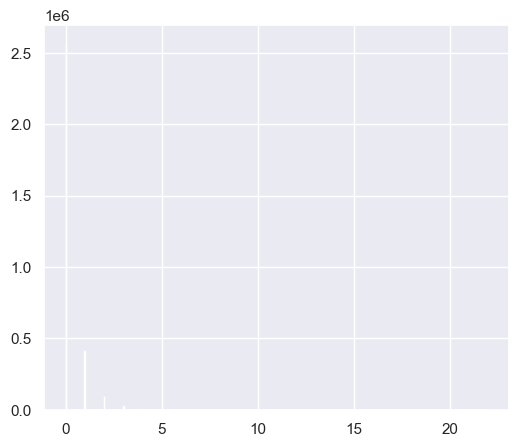

boosts


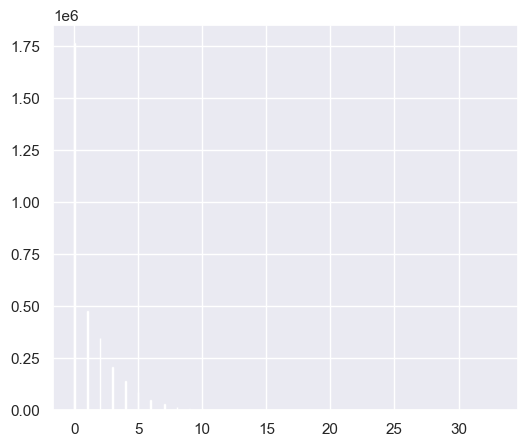

damageDealt


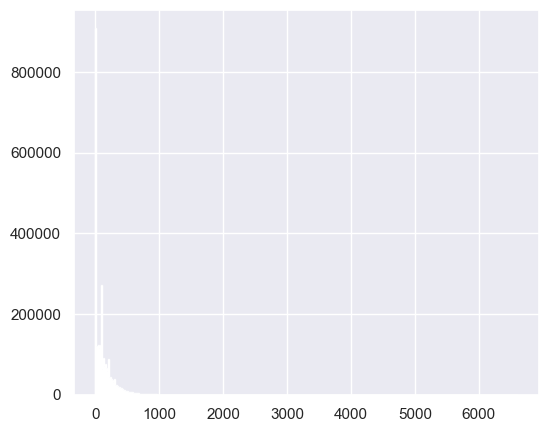

DBNOs


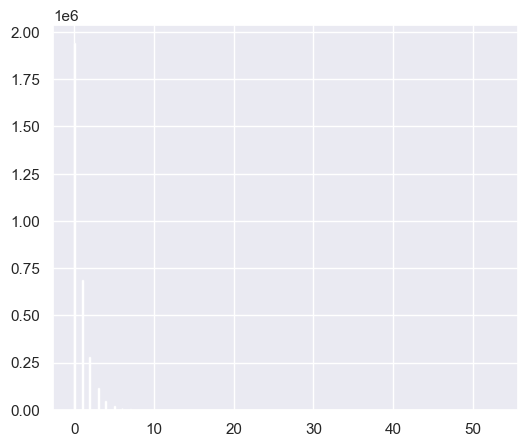

headshotKills


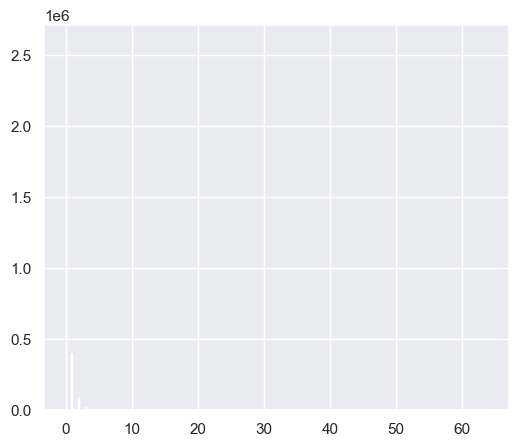

heals


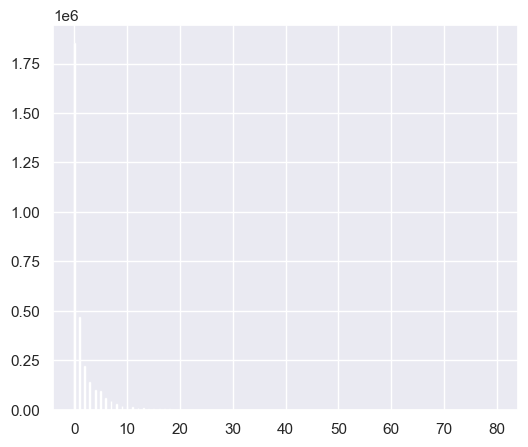

killPlace


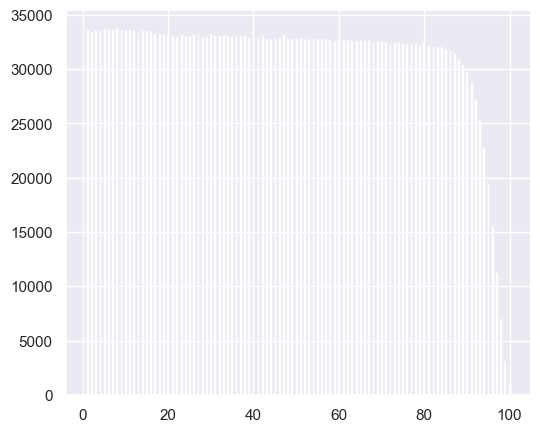

killPoints


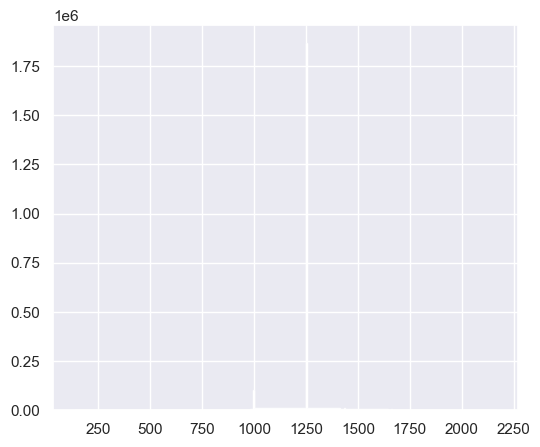

kills


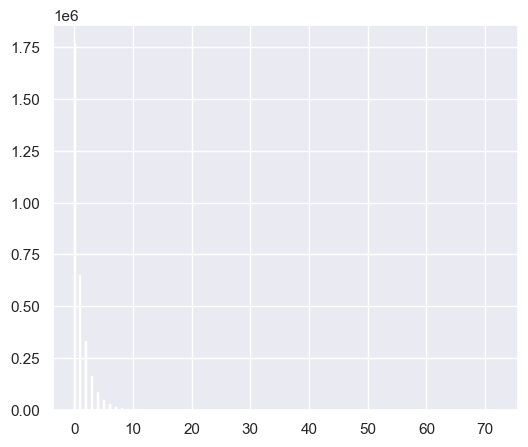

killStreaks


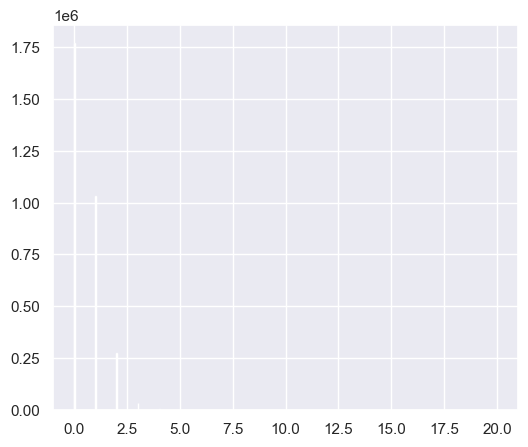

longestKill


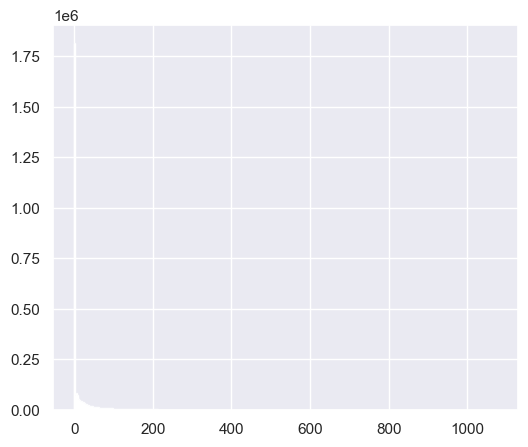

matchDuration


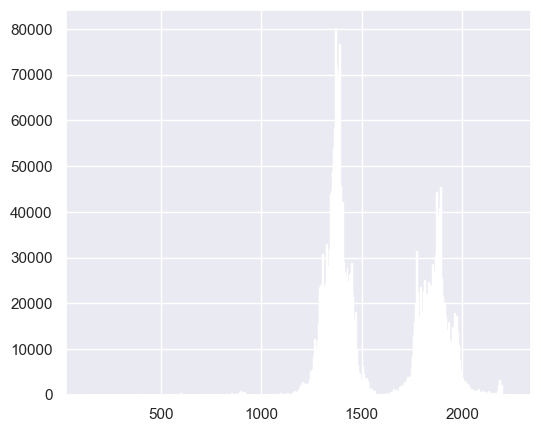

maxPlace


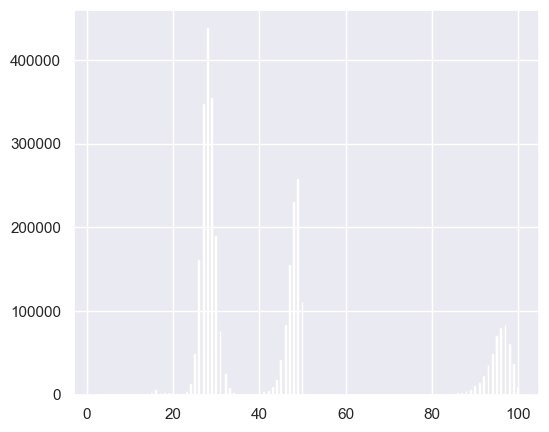

numGroups


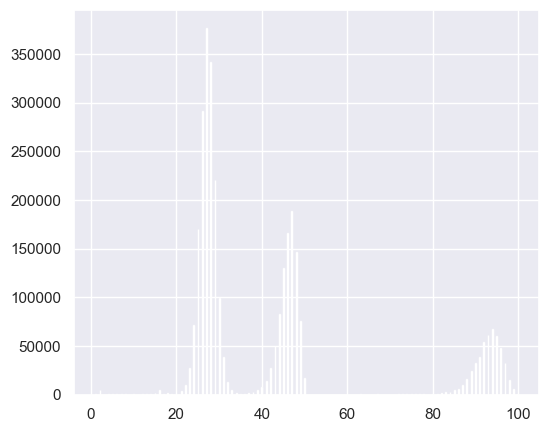

rankPoints


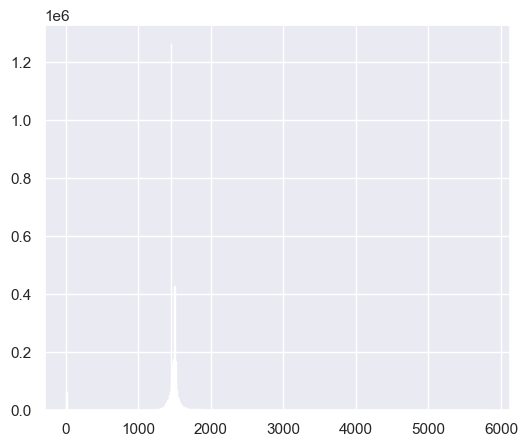

revives


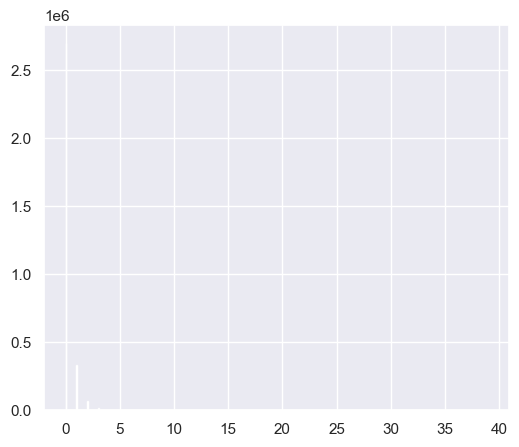

rideDistance


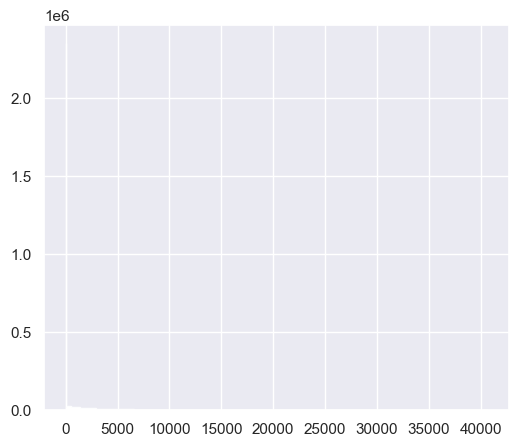

roadKills


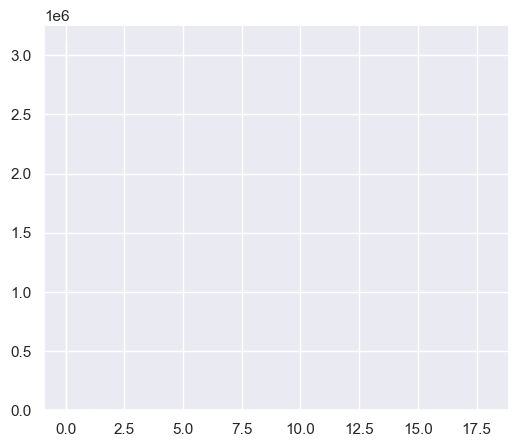

swimDistance


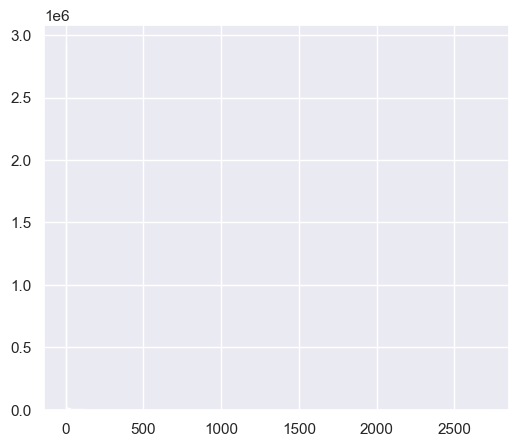

teamKills


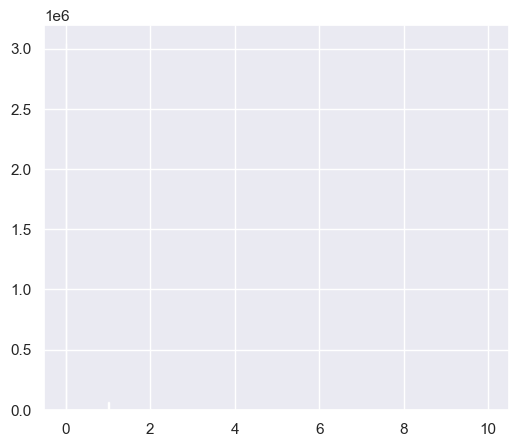

vehicleDestroys


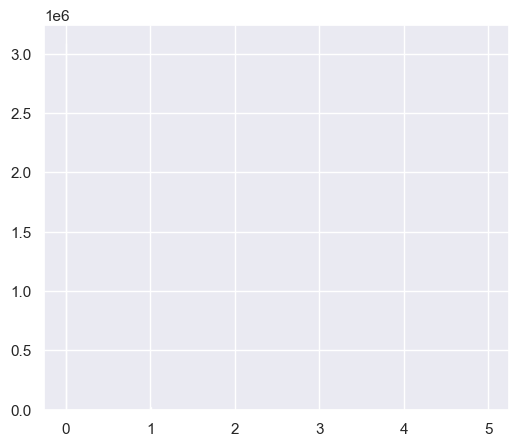

walkDistance


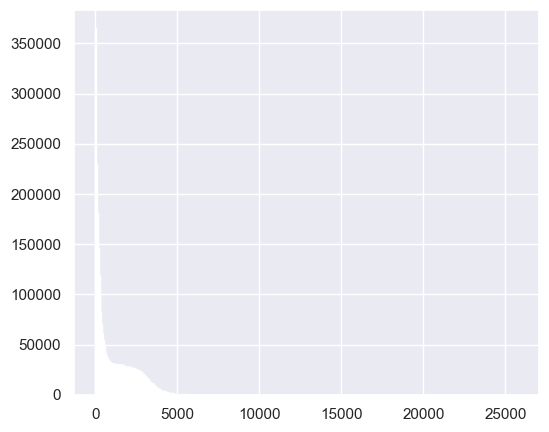

weaponsAcquired


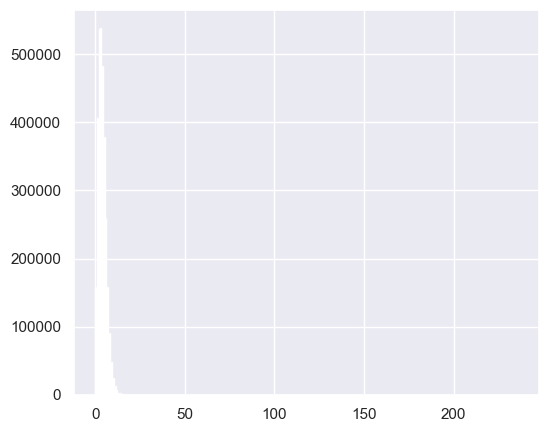

winPoints


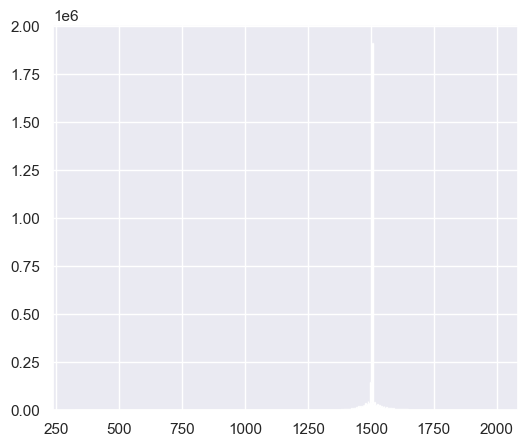

winPlacePerc


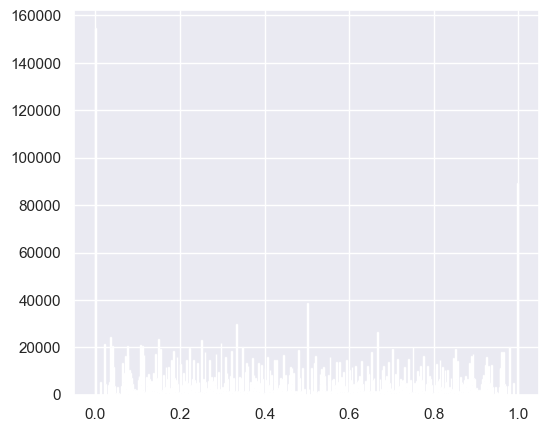

In [29]:
for i in dfnum.columns:
    plt.hist(df[i],bins=500)
    print(i)
    plt.show()

In [30]:
#plt.hist(np.power(testdf["matchDuration"],2),bins=500)
#plt.show()

In [31]:
#testdf_cont=testdfnum.drop(axis="columns",labels=["matchDuration","winPlacePerc"])
#for i in testdf_cont.columns:
#    plt.hist(np.power(testdf_cont[i],1/2.05),bins=500)
#    print(i)
#    plt.show()
#    testdf[i]=np.power(testdf_cont[i],1/2.05)

In [32]:
#testdf_new=pd.DataFrame()
#testdf_new["damageDealt"]=testdf["damageDealt"]
#testdf_new["walkDistance"]=testdf["walkDistance"]
#testdf_new["weaponsAcquired"]=testdf["weaponsAcquired"]

In [33]:
#testdf_new

In [34]:
#for i in testdf_new.columns:
#    plt.hist(np.power(testdf_new[i],1/2),bins=500)
#    print(i)
#    plt.show()
#    testdf[i]=np.power(testdf_new[i],1/2)

In [35]:
#testdf["matchDuration"]=np.power(testdf["matchDuration"],2)

#for i in testdf_cont.columns:
#    testdf[i]=testdf_cont[i]

#for i in testdf_new.columns:
#    testdf[i]=testdf_new[i]

#testdf

In [36]:
class Standardizer():
    def __init__(self,meu,stdv):
        self.meu=meu
        self.stdv=stdv

    def scale(self,x):
        return (x - self.meu)/(self.stdv)

assists


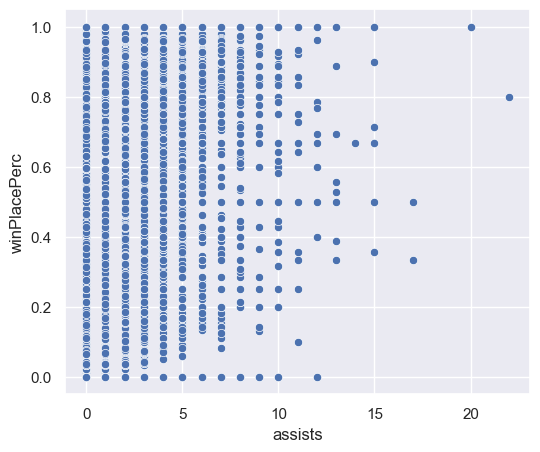

boosts


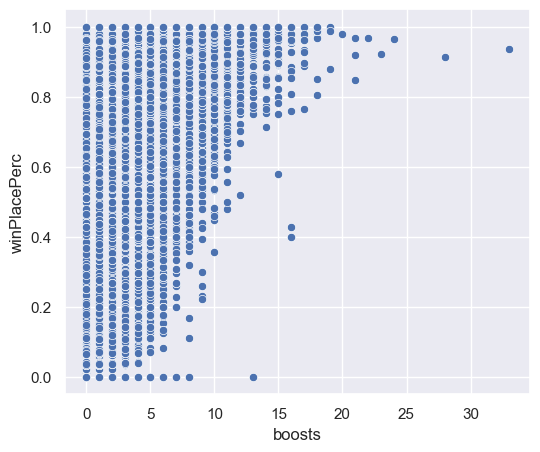

damageDealt


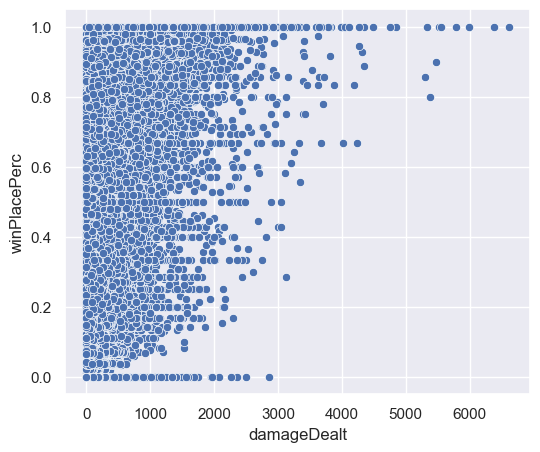

DBNOs


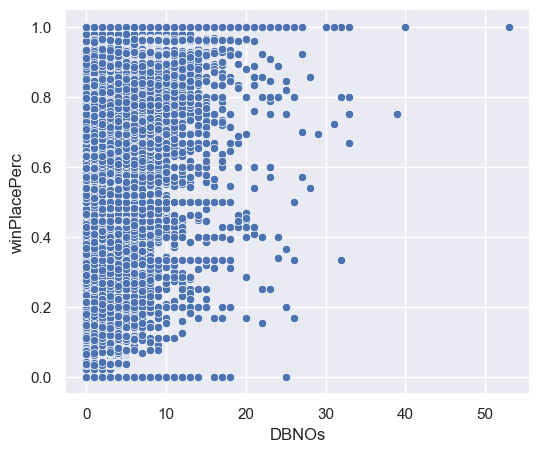

headshotKills


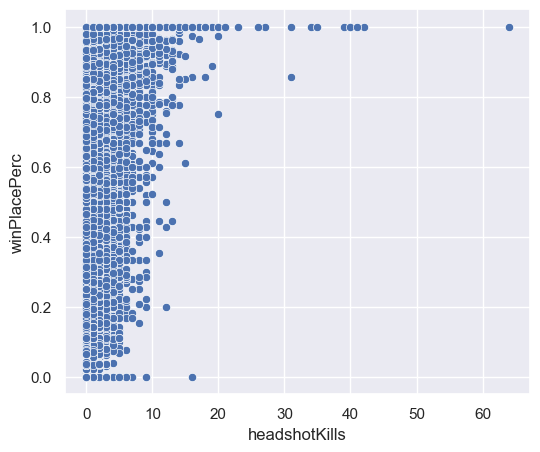

heals


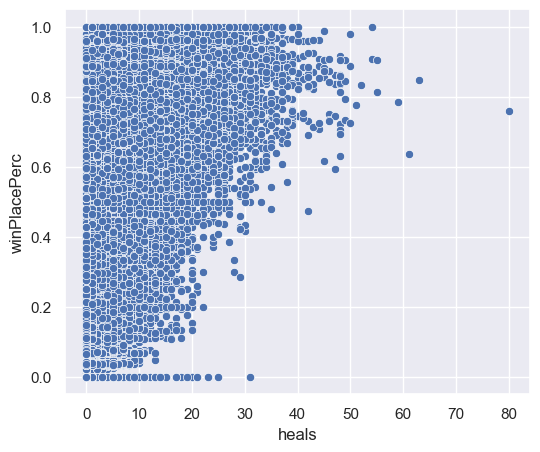

killPlace


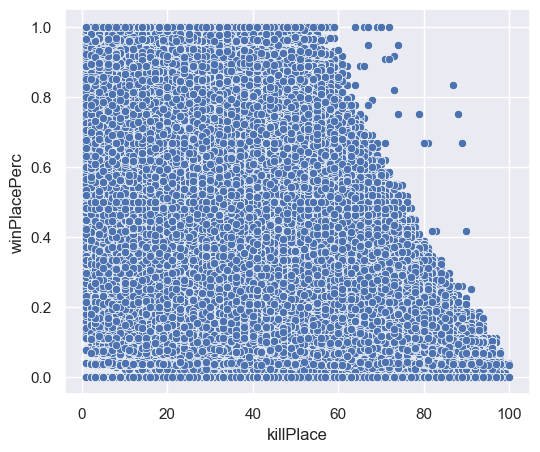

killPoints


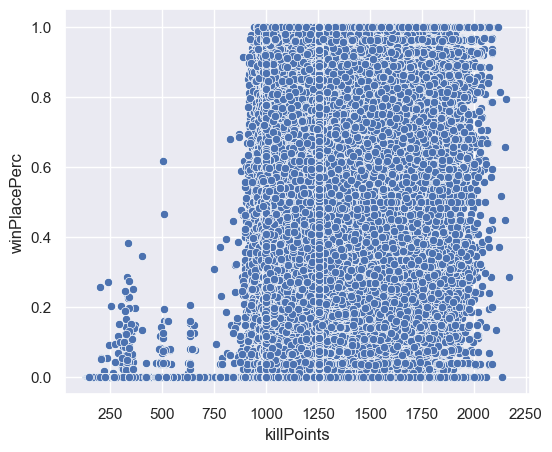

kills


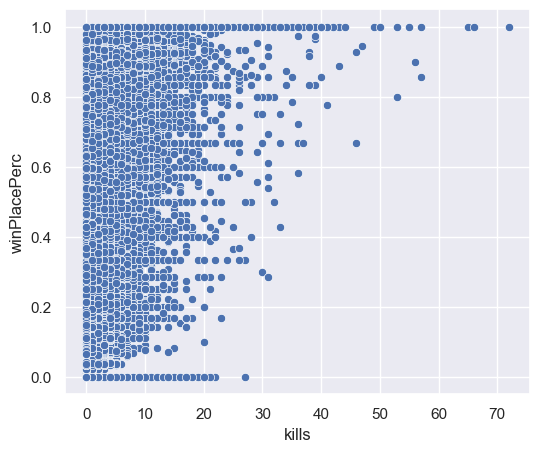

killStreaks


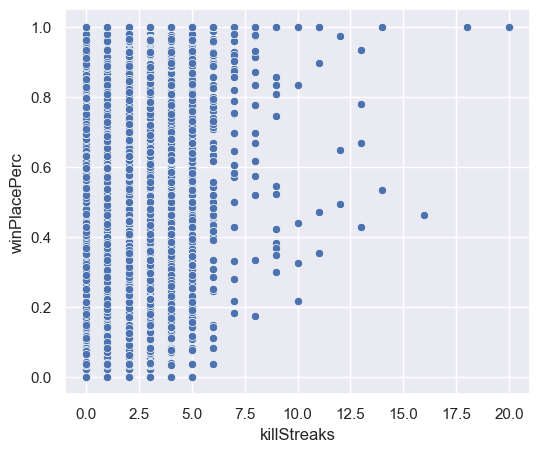

longestKill


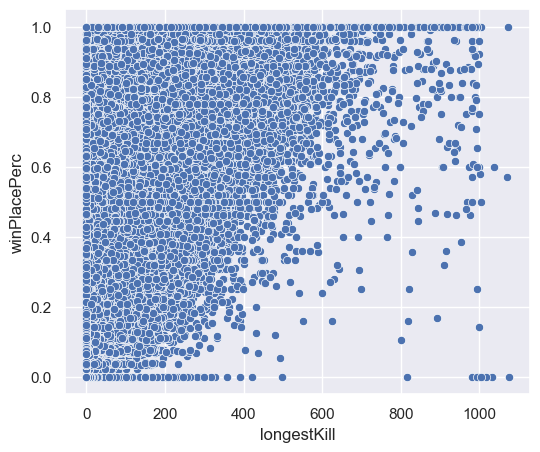

matchDuration


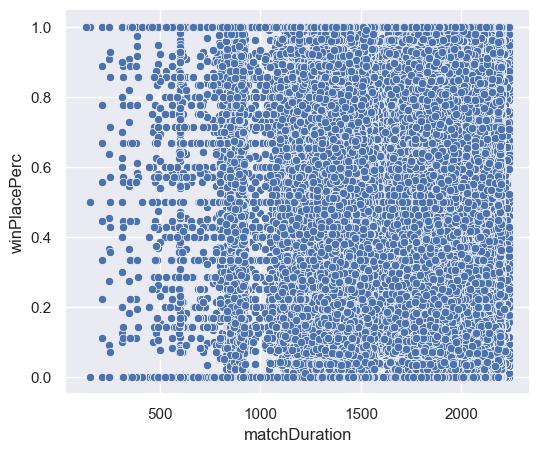

maxPlace


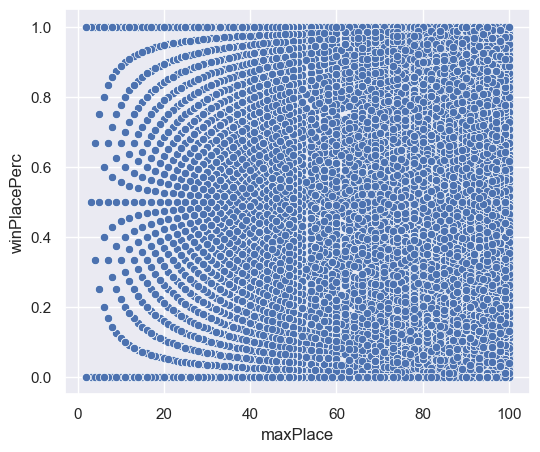

numGroups


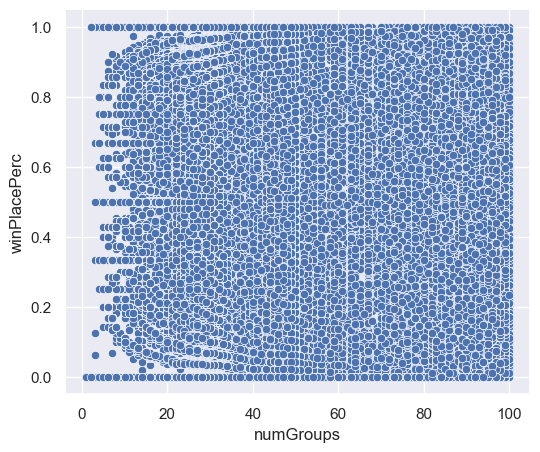

rankPoints


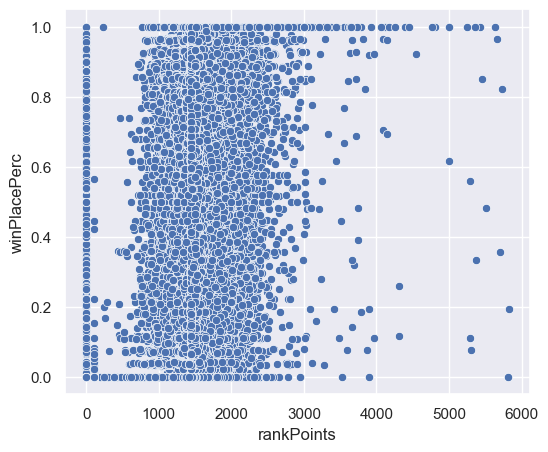

revives


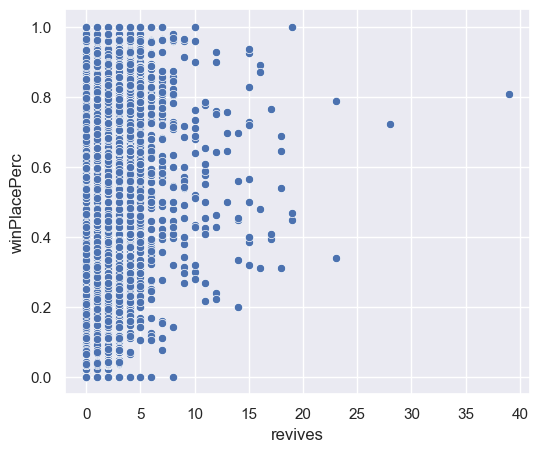

rideDistance


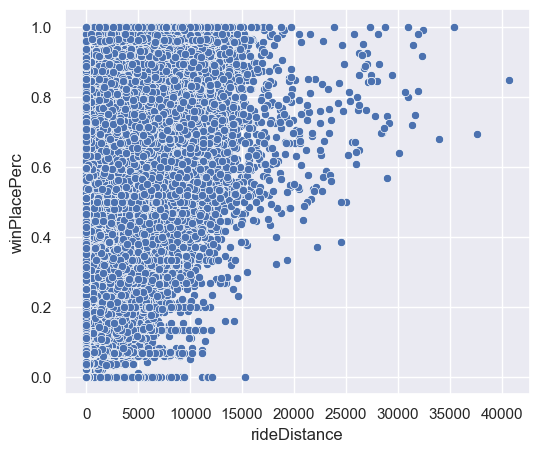

roadKills


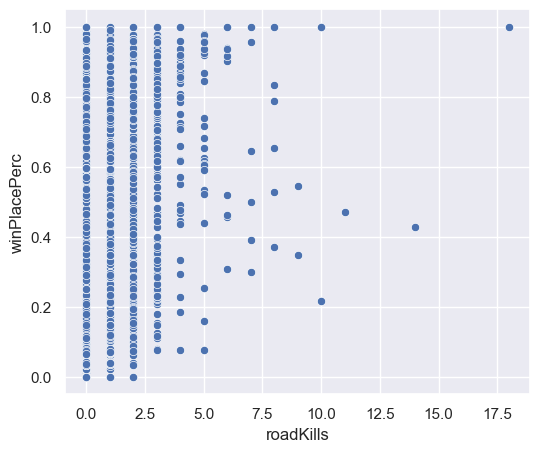

swimDistance


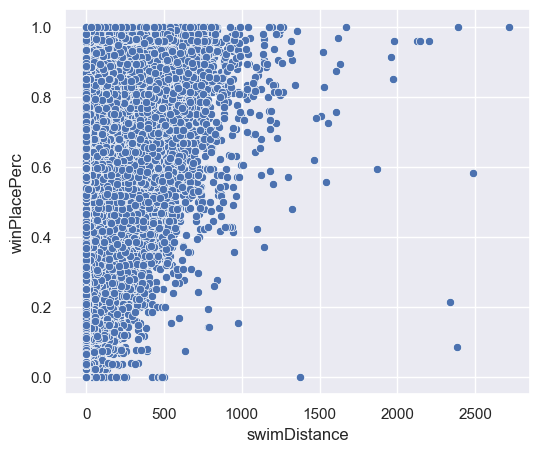

teamKills


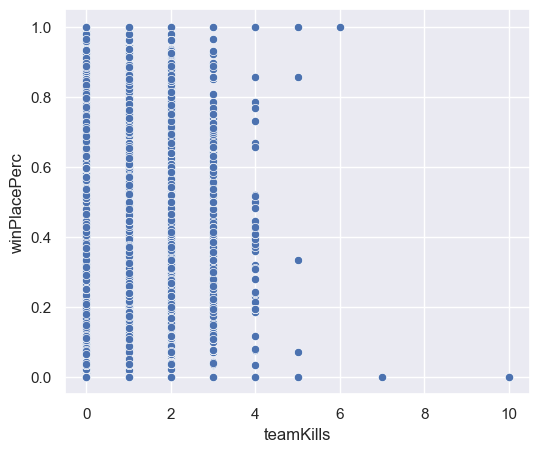

vehicleDestroys


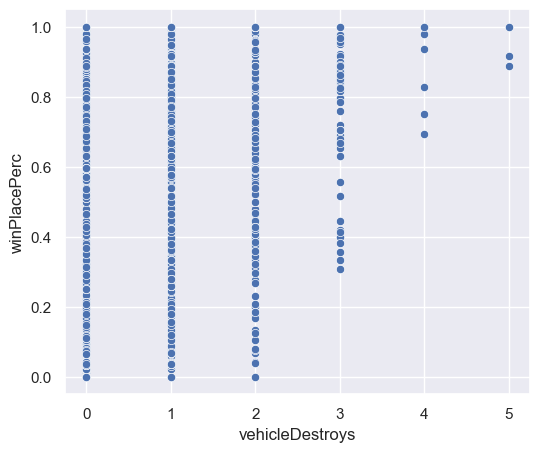

walkDistance


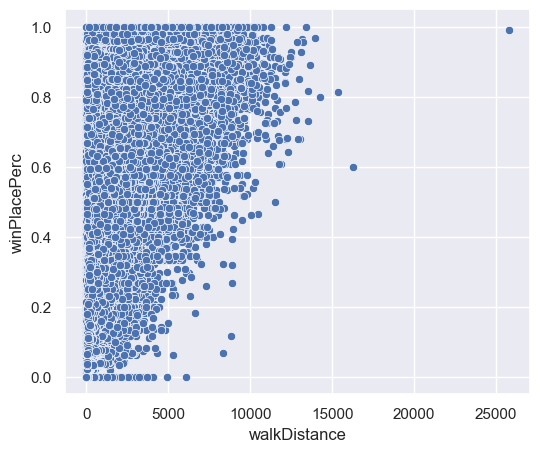

weaponsAcquired


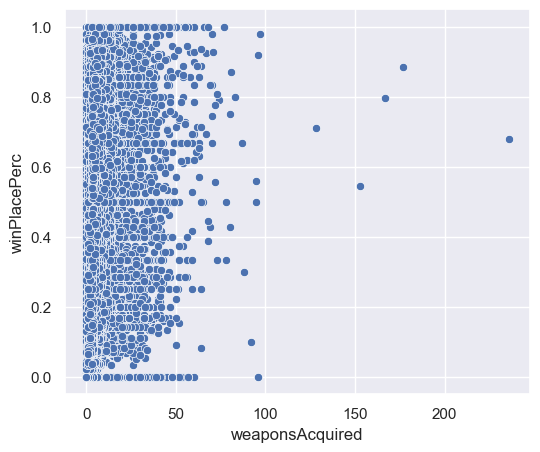

winPoints


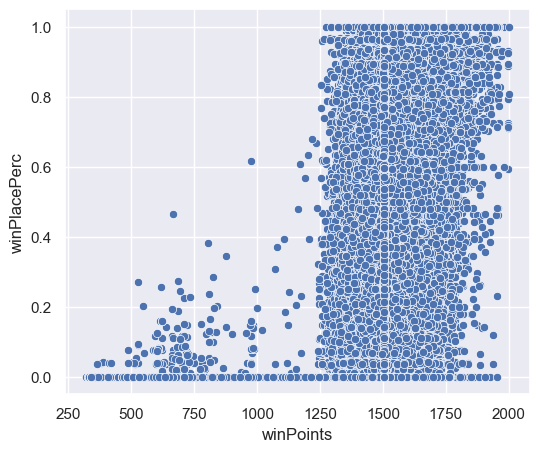

winPlacePerc


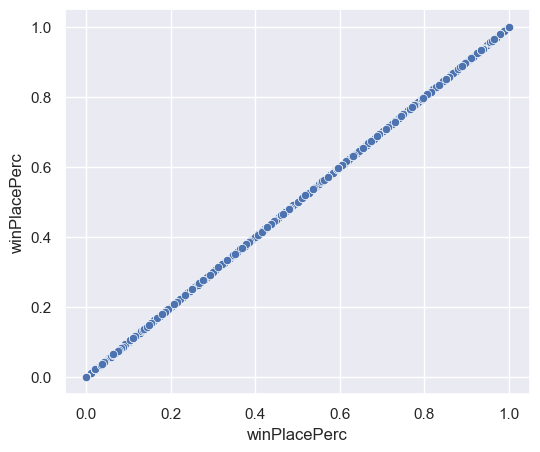

In [37]:
for i in dfnum.columns:
    #sns.boxplot(x=dfnum[i])
    sns.scatterplot(x=df[i],y=df["winPlacePerc"])
    print(i)
    plt.show()

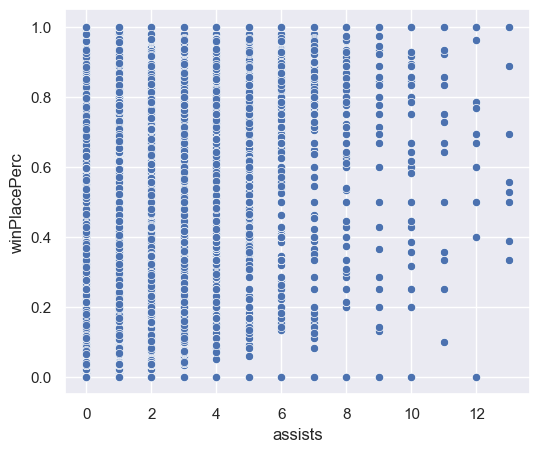

In [38]:
sns.scatterplot(x=testdf.loc[testdf["assists"]<13.7,"assists"],y=testdf["winPlacePerc"])
plt.show()
testdf=testdf.loc[testdf["assists"]<13.7]

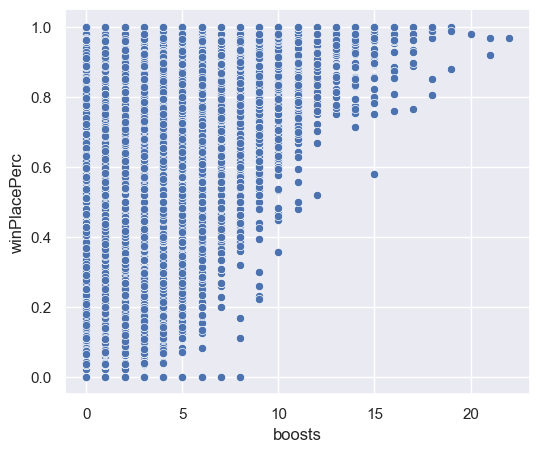

In [39]:
sns.scatterplot(x=df.loc[((-df["boosts"]+13.5*df["winPlacePerc"])>-9),"boosts"],y=df["winPlacePerc"])
plt.show()
df=df.loc[((-df["boosts"]+13.5*df["winPlacePerc"])>-9)]

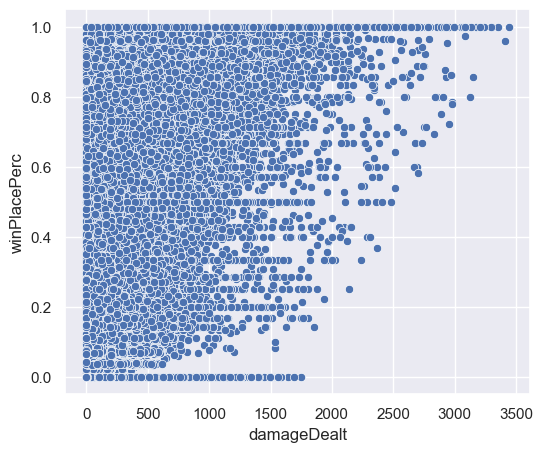

In [40]:
sns.scatterplot(x=df.loc[((-df["damageDealt"]+1750*df["winPlacePerc"]>-1750)),"damageDealt"],y=df["winPlacePerc"])
plt.show()
df=df.loc[((-df["damageDealt"]+1750*df["winPlacePerc"]>-1750))]

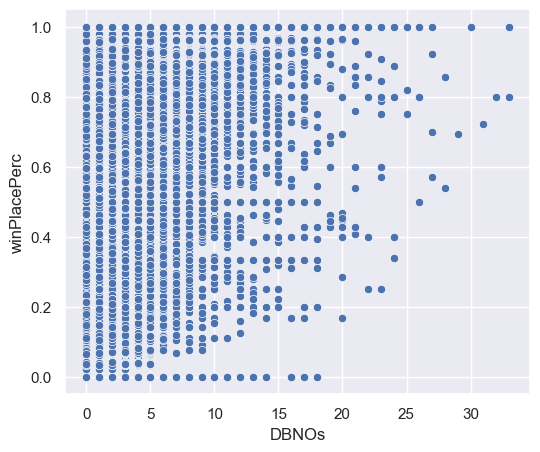

In [41]:
sns.scatterplot(x=df.loc[((20*df["winPlacePerc"]-df["DBNOs"]>-25)&(df["DBNOs"]<35)),"DBNOs"],y=df["winPlacePerc"])
plt.show()
df=df.loc[((20*df["winPlacePerc"]-df["DBNOs"]>-25)&(df["DBNOs"]<35))]

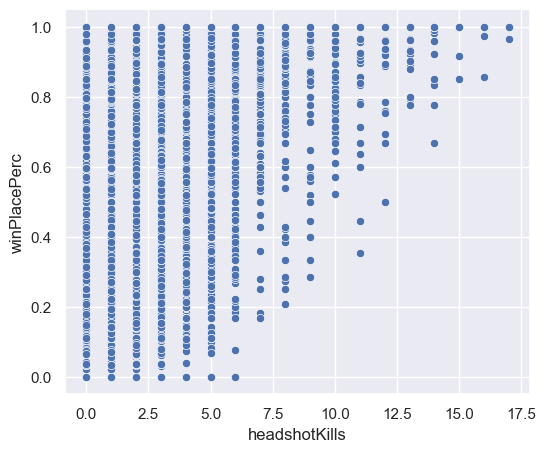

In [42]:
sns.scatterplot(x=df.loc[(-df["headshotKills"]+10.5*df["winPlacePerc"]>-7.5),"headshotKills"],y=df["winPlacePerc"])
plt.show()
df=df.loc[(-df["headshotKills"]+10.5*df["winPlacePerc"]>-7.5)]

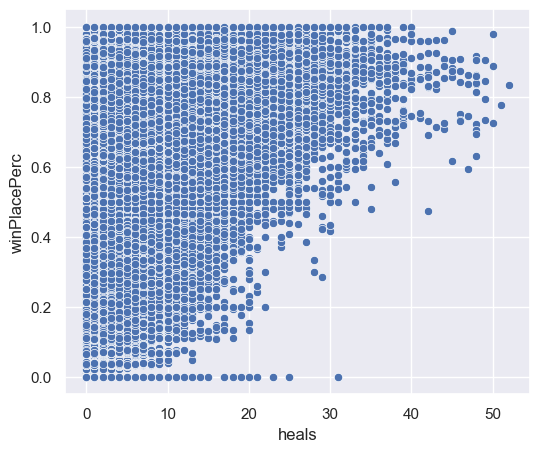

In [43]:
sns.scatterplot(x=testdf.loc[testdf["heals"]<52.5,"heals"],y=testdf["winPlacePerc"])
plt.show()
testdf=testdf.loc[testdf["heals"]<52.5]

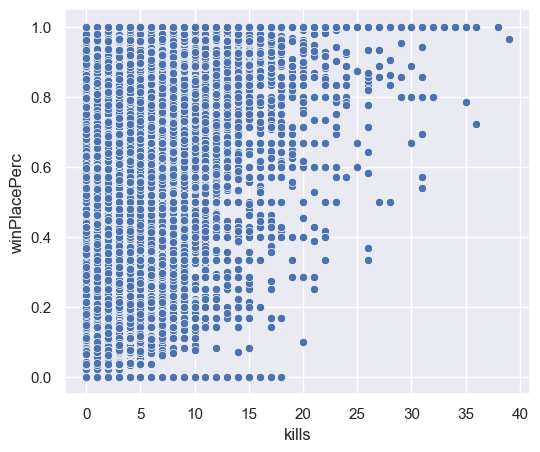

In [44]:
sns.scatterplot(x=df.loc[df["kills"]<44.5,"kills"],y=df["winPlacePerc"])
plt.show()
df=df.loc[df["kills"]<44.5]

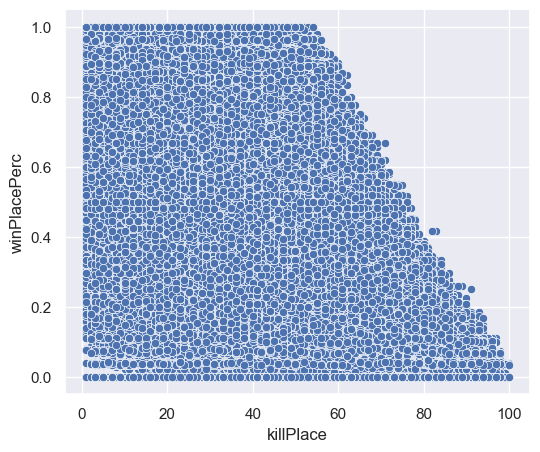

In [45]:
sns.scatterplot(x=df.loc[(7*df["killPlace"]+400*df["winPlacePerc"]<780),"killPlace"],y=df["winPlacePerc"])
plt.show()
df=df.loc[(7*df["killPlace"]+400*df["winPlacePerc"]<780)]

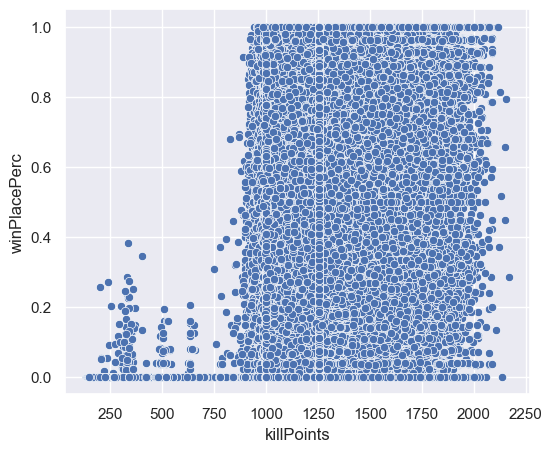

In [46]:
sns.scatterplot(x=df.loc[((df["killPoints"]>750)|(df["winPlacePerc"]<0.42)),"killPoints"],y=df["winPlacePerc"])
plt.show()
df=df.loc[((df["killPoints"]>750)|(df["winPlacePerc"]<0.42))]

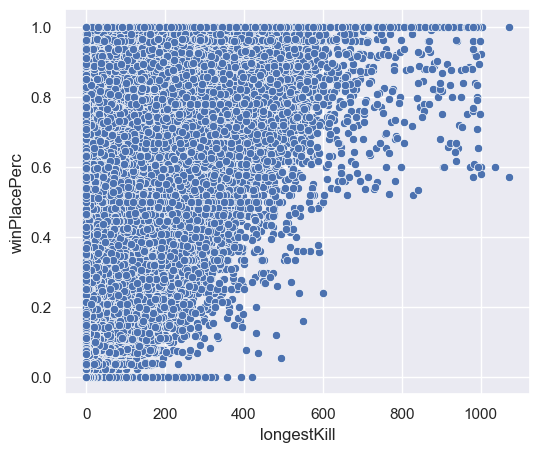

In [47]:
sns.scatterplot(x=df.loc[((df["longestKill"]<1075)&((df["longestKill"]<600)|(df["winPlacePerc"]>0.5))),"longestKill"],y=df["winPlacePerc"])
plt.show()
df=df.loc[((df["longestKill"]<1075)&((df["longestKill"]<600)|(df["winPlacePerc"]>0.5)))]

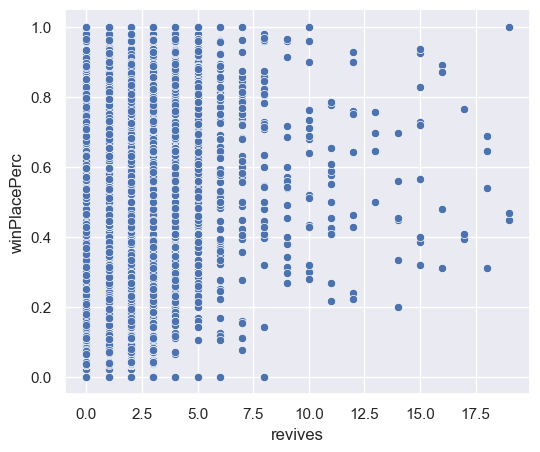

In [48]:
sns.scatterplot(x=df.loc[df["revives"]<22.5,"revives"],y=df["winPlacePerc"])
plt.show()
df=df.loc[df["revives"]<22.5]

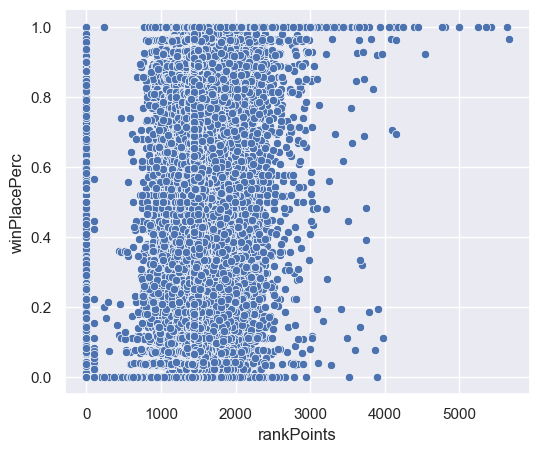

In [49]:
sns.scatterplot(x=df.loc[((df["rankPoints"]<4200)|(df["winPlacePerc"]>0.88)),"rankPoints"],y=df["winPlacePerc"])
plt.show()
df=df.loc[((df["rankPoints"]<4200)|(df["winPlacePerc"]>0.88))]

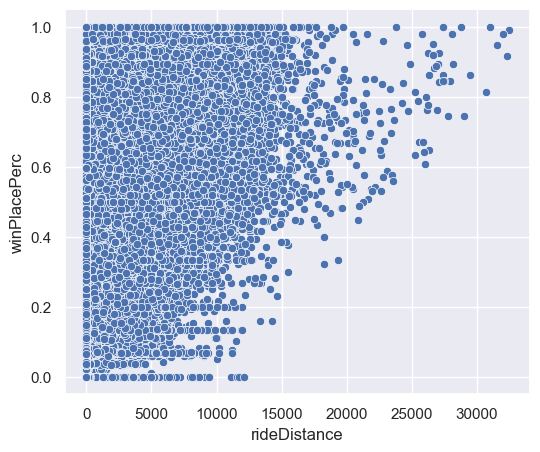

In [50]:
sns.scatterplot(x=df.loc[-df["rideDistance"]+22000*df["winPlacePerc"]>-13000,"rideDistance"],y=df["winPlacePerc"])
plt.show()
df=df.loc[-df["rideDistance"]+22000*df["winPlacePerc"]>-13000]

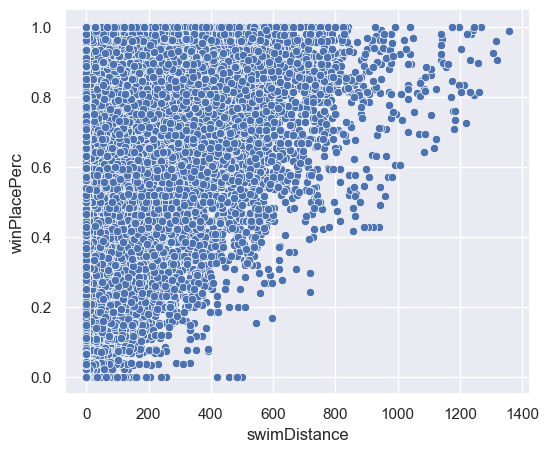

In [51]:
sns.scatterplot(x=df.loc[-df["swimDistance"]+975*df["winPlacePerc"]>-525,"swimDistance"],y=df["winPlacePerc"])
plt.show()
df=df.loc[-df["swimDistance"]+975*df["winPlacePerc"]>-525]

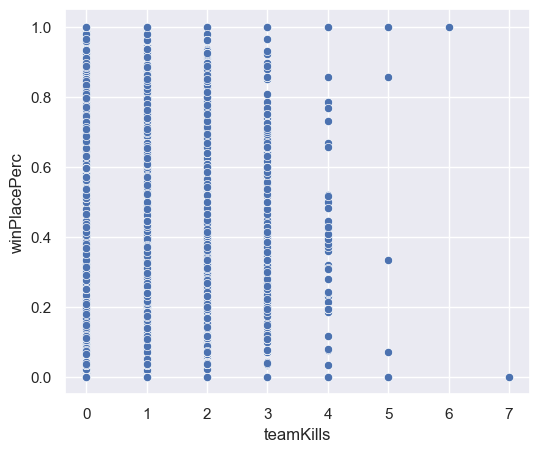

In [52]:
sns.scatterplot(x=df.loc[df["teamKills"]<8.5,"teamKills"],y=df["winPlacePerc"])
plt.show()
df=df.loc[df["teamKills"]<8.5]

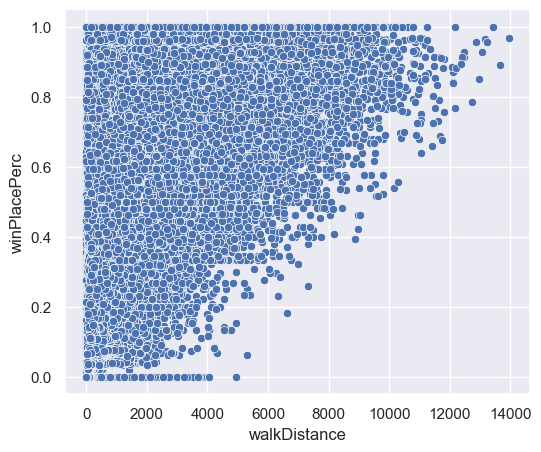

In [53]:
sns.scatterplot(x=df.loc[(-df["walkDistance"]+10000*df["winPlacePerc"]>-5000),"walkDistance"],y=df["winPlacePerc"])
plt.show()
df=df.loc[(-df["walkDistance"]+10000*df["winPlacePerc"]>-5000)]

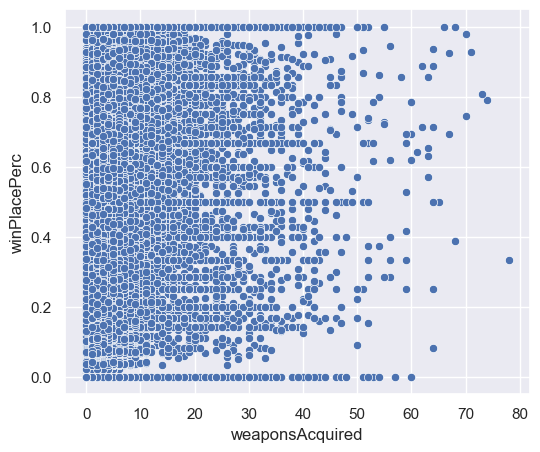

In [54]:
sns.scatterplot(x=df.loc[df["weaponsAcquired"]<80,"weaponsAcquired"],y=df["winPlacePerc"])
plt.show()
df=df.loc[df["weaponsAcquired"]<80]

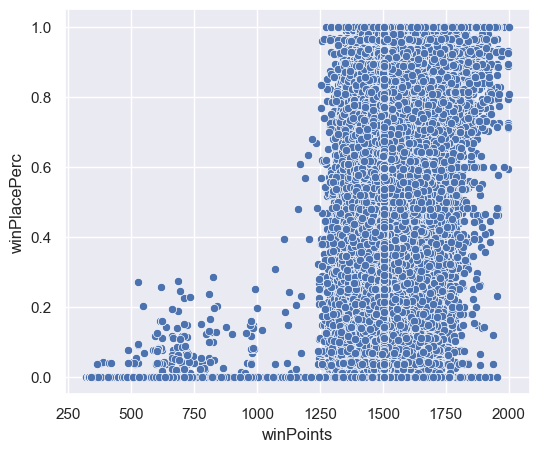

In [55]:
sns.scatterplot(x=df.loc[((df["winPoints"]>1100)|(df["winPlacePerc"]<0.32)),"winPoints"],y=df["winPlacePerc"])
plt.show()
df=df.loc[((df["winPoints"]>1100)|(df["winPlacePerc"]<0.32))]

In [56]:
df

Id  groupId  matchId  assists  boosts  damageDealt  DBNOs  \
0         515694  1301253    28867        0       1        23.54      0   
1        2005698   902286     2030        0       0        46.04      0   
2        2087974   324684     8011        1       0        51.60      0   
3        3059764   218395    31407        2       2       165.20      0   
4        1273299   318809    37438        0       0        14.69      0   
...          ...      ...      ...      ...     ...          ...    ...   
3112871  1930258   734606      668        0       0         0.00      0   
3112872  1590317  1027977    25218        0       1        43.00      0   
3112873    23230   451653    32584        2       0       191.80      3   
3112874  2158097  1257585    39517        1       0       243.00      2   
3112875  1480299  1436876    29475        0       1       192.50      0   

         headshotKills  heals  killPlace  ...  revives  rideDistance  \
0                    0      1         47  ...        0           0.0   
1                    0      0         58  ...        0           0.0   
2                    0      0         62  ...        0           0.0   
3                    0      1         50  ...        0           0.0   
4                    0      0         37  ...        0        5218.0   
...                ...    ...        ...  ...      ...           ...   
3112871              0      0         55  ...        0           0.0   
3112872              0      1         49  ...        0           0.0   
3112873              0      1         26  ...        0           0.0   
3112874              0      1         20  ...        0           0.0   
3112875              0      1         53  ...        0           0.0   

         roadKills  swimDistance  teamKills  vehicleDestroys  walkDistance  \
0                0          0.00          0                0       2600.00   
1                0          0.00          0                0        239.00   
2                0          0.00          0                0       1589.00   
3                0         48.32          0                0       3180.00   
4                0          0.00          0                0       1687.00   
...            ...           ...        ...              ...           ...   
3112871          0          0.00          0                0         29.34   
3112872          0          0.00          0                0       2264.00   
3112873          0          0.00          0                0       3585.00   
3112874          0          0.00          0                0        132.80   
3112875          0          0.00          0                0       2277.00   

         weaponsAcquired    winPoints  winPlacePerc  
0                      5  1485.000000        0.7143  
1                      1  1555.000000        0.3500  
2                      4  1441.000000        0.5556  
3                      8  1505.590299        0.7778  
4                      3  1500.000000        0.4000  
...                  ...          ...           ...  
3112871                1  1505.590299        0.4286  
3112872                4  1505.590299        0.7708  
3112873                6  1505.590299        0.8889  
3112874                2  1418.000000        0.2083  
3112875                7  1437.000000        0.7083  

[3112549 rows x 29 columns]

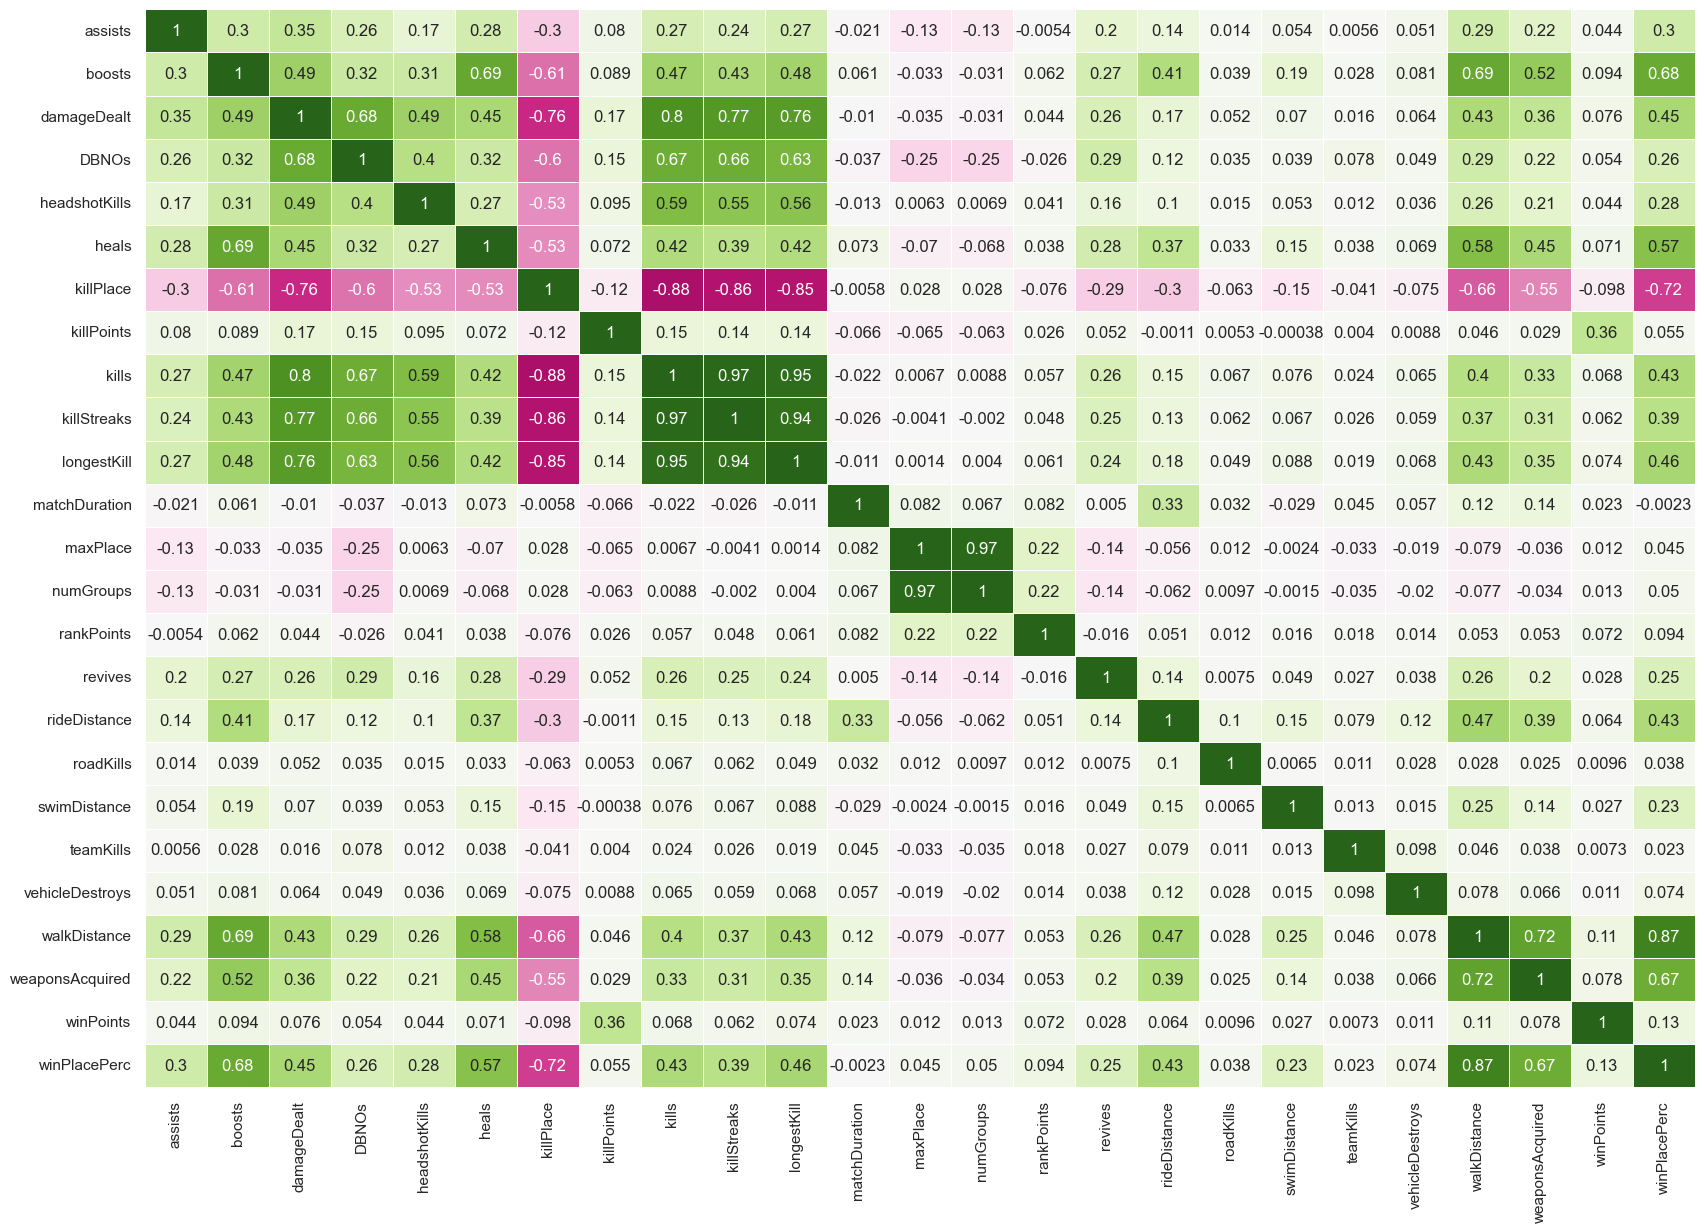

In [57]:
sns.set(rc={'figure.figsize':(20,14)})
dfnum=df.drop(axis="columns",labels=dfcat.columns.to_list())
sns.heatmap(dfnum.corr(method="spearman"),
            annot=True,
            linewidths=.5,
            center=0,
            cbar=False,
            cmap="PiYG")
plt.show()
sns.set(rc={'figure.figsize':(6,5)})

In [58]:
#df.drop(axis="columns",labels=["killPoints","kills","matchDuration","maxPlace","numGroups","rankPoints","roadKills","teamKills","vehicleDestroys","winPlace"],inplace=True)
df.drop(axis="columns",labels=["boosts","damageDealt","DBNOs","killPoints","kills","killStreaks","longestKill","maxPlace","weaponsAcquired"],inplace=True)
df.drop(axis="columns",labels=["matchDuration","numGroups","rankPoints","roadKills","teamKills","vehicleDestroys","winPoints"],inplace=True)

In [59]:
import scipy.stats as ss

def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x,y)
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r-((r-1)**2)/(n-1)
    kcorr = k-((k-1)**2)/(n-1)
    return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))

In [60]:
dfcat=pd.DataFrame()
dfcat["matchId"]=df["matchId"]
dfcat["Id"]=df["Id"]
dfcat["groupId"]=df["groupId"]
dfcat["matchType"]=df["matchType"]
dfcat.head()

matchId       Id  groupId  matchType
0    28867   515694  1301253         15
1     2030  2005698   902286          3
2     8011  2087974   324684         15
3    31407  3059764   218395         15
4    37438  1273299   318809         11

In [61]:
cramers_v(dfcat["matchId"],dfcat["matchType"])

0.9922678593455657

In [62]:
cramers_v(dfcat["groupId"],dfcat["matchType"])

0.6686295393056314

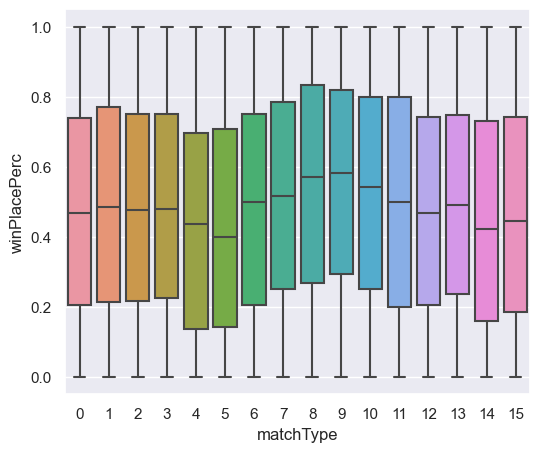

In [63]:
sns.boxplot(x=df["matchType"],y=df["winPlacePerc"])
plt.show()

In [64]:
df.drop(axis="columns",labels=["matchId","Id"],inplace=True)
dfnum=df.drop(axis="columns",labels=["groupId","matchType","winPlacePerc"])

In [65]:

for i in dfnum.columns:
    normcol=df[i]
    scaler=Standardizer(normcol.mean(),normcol.std())
    scaledcol=normcol.apply(scaler.scale)
    #print(i)
    #sns.displot(scaledcol,kde=True)
    #plt.show()
    df[i]=scaledcol    

In [66]:
testdf=pd.read_csv("test_up.csv")
mockdf=pd.read_csv("mocksubmission.csv")

FileNotFoundError: [Errno 2] No such file or directory: 'test_up.csv'

In [ ]:
testdf.head()

Id         groupId         matchId  assists  boosts  \
0  a5e44e9ccbd861  d59db3787770f1  673b10e9fb9569        0       0   
1  ec09f9f5c29d75  fa6c32fa872ffb  f4962a6445499b        4       4   
2  fe603d927d7792  96a01db6216403  f6c6ca38bd0452        0       0   
3  f7aa0b9da441b1  18f0ea9d617675  0ef5e1ef794417        0       8   
4  bcd3f9cb689f6c  6d0a87eb28a92f  42abdc80c2f13b        0       0   

   damageDealt  DBNOs  headshotKills  heals  killPlace  ...  rankPoints  \
0          0.0      0              0      0         84  ...          -1   
1        637.2      2              1      1          6  ...        1478   
2          0.0      0              0      0         74  ...          -1   
3        830.8      5              0      1          1  ...        1531   
4          0.0      0              0      0         75  ...        1489   

   revives  rideDistance  roadKills  swimDistance teamKills  vehicleDestroys  \
0        0           0.0          0         0.000         0                0   
1        1           0.0          0         6.755         0                0   
2        0           0.0          0         0.000         0                0   
3        0           0.0          0         0.000         0                0   
4        1           0.0          0         0.000         0                0   

   walkDistance  weaponsAcquired  winPoints  
0         11.92                0       1516  
1       3547.00                3          0  
2        558.60                2       1492  
3       3443.00                6          0  
4        107.50                1          0  

[5 rows x 28 columns]

In [ ]:
testdf.describe()

assists        boosts   damageDealt         DBNOs  headshotKills  \
count  1.334090e+06  1.334090e+06  1.334090e+06  1.334090e+06   1.334090e+06   
mean   2.335607e-01  1.104922e+00  1.305197e+02  6.557609e-01   2.266706e-01   
std    5.880474e-01  1.714592e+00  1.708329e+02  1.143485e+00   6.010298e-01   
min    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   0.000000e+00   
25%    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   0.000000e+00   
50%    0.000000e+00  0.000000e+00  8.400000e+01  0.000000e+00   0.000000e+00   
75%    0.000000e+00  2.000000e+00  1.854000e+02  1.000000e+00   0.000000e+00   
max    2.100000e+01  2.400000e+01  5.479000e+03  3.900000e+01   4.600000e+01   

              heals     killPlace    killPoints         kills   killStreaks  \
count  1.334090e+06  1.334090e+06  1.334090e+06  1.334090e+06  1.334090e+06   
mean   1.368665e+00  4.763966e+01  5.049926e+02  9.237038e-01  5.433711e-01   
std    2.681799e+00  2.746317e+01  6.274200e+02  1.557668e+00  7.104985e-01   
min    0.000000e+00  1.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%    0.000000e+00  2.400000e+01  0.000000e+00  0.000000e+00  0.000000e+00   
50%    0.000000e+00  4.700000e+01  0.000000e+00  0.000000e+00  0.000000e+00   
75%    2.000000e+00  7.100000e+01  1.172000e+03  1.000000e+00  1.000000e+00   
max    7.300000e+01  1.010000e+02  2.156000e+03  5.600000e+01  1.200000e+01   

       ...    rankPoints       revives  rideDistance     roadKills  \
count  ...  1.334090e+06  1.334090e+06  1.334090e+06  1.334090e+06   
mean   ...  8.918977e+02  1.642873e-01  6.042083e+02  3.475028e-03   
std    ...  7.366239e+02  4.724911e-01  1.493394e+03  7.217662e-02   
min    ... -1.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%    ... -1.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
50%    ...  1.443000e+03  0.000000e+00  0.000000e+00  0.000000e+00   
75%    ...  1.500000e+03  0.000000e+00  5.110000e-02  0.000000e+00   
max    ...  5.910000e+03  3.200000e+01  3.129000e+04  1.100000e+01   

       swimDistance     teamKills  vehicleDestroys  walkDistance  \
count  1.334090e+06  1.334090e+06     1.334090e+06  1.334090e+06   
mean   4.458578e+00  2.400663e-02     7.940993e-03  1.152637e+03   
std    3.025125e+01  1.678188e-01     9.250435e-02  1.183499e+03   
min    0.000000e+00  0.000000e+00     0.000000e+00  0.000000e+00   
25%    0.000000e+00  0.000000e+00     0.000000e+00  1.546000e+02   
50%    0.000000e+00  0.000000e+00     0.000000e+00  6.830000e+02   
75%    0.000000e+00  0.000000e+00     0.000000e+00  1.972000e+03   
max    3.823000e+03  1.200000e+01     4.000000e+00  1.513000e+04   

       weaponsAcquired     winPoints  
count     1.334090e+06  1.334090e+06  
mean      3.656769e+00  6.064880e+02  
std       2.450128e+00  7.396696e+02  
min       0.000000e+00  0.000000e+00  
25%       2.000000e+00  0.000000e+00  
50%       3.000000e+00  0.000000e+00  
75%       5.000000e+00  1.495000e+03  
max       1.020000e+02  2.013000e+03  

[8 rows x 24 columns]

In [ ]:
mockdf.head()

Id  winPlacePerc
0   0           1.0
1   1           1.0
2   2           1.0
3   3           1.0
4   4           1.0

In [ ]:
mockdf.describe()

Id  winPlacePerc
count  1.467499e+06     1467499.0
mean   7.337490e+05           1.0
std    4.236306e+05           0.0
min    0.000000e+00           1.0
25%    3.668745e+05           1.0
50%    7.337490e+05           1.0
75%    1.100624e+06           1.0
max    1.467498e+06           1.0

In [ ]:
testdf.loc[testdf["rankPoints"]==-1,"rankPoints"]=np.nan
testdf.loc[((testdf["rankPoints"]!=-1) & (testdf["killPoints"]==0)),"killPoints"]=np.nan
testdf.loc[((testdf["rankPoints"]!=-1) & (testdf["winPoints"]==0)),"winPoints"]=np.nan

In [ ]:
#mockdf.loc[mockdf["rankPoints"]==-1,"rankPoints"]=np.nan
#mockdf.loc[((mockdf["rankPoints"]!=-1) & (mockdf["killPoints"]==0)),"killPoints"]=np.nan
#mockdf.loc[((mockdf["rankPoints"]!=-1) & (mockdf["winPoints"]==0)),"winPoints"]=np.nan

In [ ]:
testdf.loc[testdf["killPoints"].isna(),"killPoints"]=testdf["killPoints"].mean()
testdf.loc[testdf["winPoints"].isna(),"winPoints"]=testdf["winPoints"].mean()
testdf.loc[testdf["rankPoints"].isna(),"rankPoints"]=testdf["rankPoints"].mean()

In [ ]:
#mockdf.loc[mockdf["killPoints"].isna(),"killPoints"]=mockdf["killPoints"].mean()
#mockdf.loc[mockdf["winPoints"].isna(),"winPoints"]=mockdf["winPoints"].mean()
##mockdf.loc[mockdf["rankPoints"].isna(),"rankPoints"]=mockdf["rankPoints"].mean()

In [ ]:
new_type=lbl_encodr.fit_transform(testdf["groupId"])
testdf["groupId"]=new_type

In [ ]:
testdf.head()

Id  groupId         matchId  assists  boosts  damageDealt  \
0  a5e44e9ccbd861   835129  673b10e9fb9569        0       0          0.0   
1  ec09f9f5c29d75   978950  f4962a6445499b        4       4        637.2   
2  fe603d927d7792   588971  f6c6ca38bd0452        0       0          0.0   
3  f7aa0b9da441b1    97309  0ef5e1ef794417        0       8        830.8   
4  bcd3f9cb689f6c   426638  42abdc80c2f13b        0       0          0.0   

   DBNOs  headshotKills  heals  killPlace  ...   rankPoints  revives  \
0      0              0      0         84  ...  1445.500168        0   
1      2              1      1          6  ...  1478.000000        1   
2      0              0      0         74  ...  1445.500168        0   
3      5              0      1          1  ...  1531.000000        0   
4      0              0      0         75  ...  1489.000000        1   

   rideDistance  roadKills  swimDistance teamKills  vehicleDestroys  \
0           0.0          0         0.000         0                0   
1           0.0          0         6.755         0                0   
2           0.0          0         0.000         0                0   
3           0.0          0         0.000         0                0   
4           0.0          0         0.000         0                0   

   walkDistance  weaponsAcquired    winPoints  
0         11.92                0  1516.000000  
1       3547.00                3  1505.432281  
2        558.60                2  1492.000000  
3       3443.00                6  1505.432281  
4        107.50                1  1505.432281  

[5 rows x 28 columns]

In [ ]:
#testdf.drop(['index'], axis=1)

In [ ]:
testdf["matchType"]

0                     squad
1                 squad-fpp
2                 squad-fpp
3                       duo
4                 squad-fpp
                 ...       
1334085             duo-fpp
1334086           squad-fpp
1334087    normal-squad-fpp
1334088             duo-fpp
1334089           squad-fpp
Name: matchType, Length: 1334090, dtype: object

In [ ]:
new_type=lbl_encodr.fit_transform(testdf["matchType"])
testdf["matchType"]=new_type

In [ ]:
#new_type=lbl_encodr.fit_transform(mockdf["groupId"])
#mockdf["groupId"]=new_type

In [ ]:
#new_type=lbl_encodr.fit_transform(mockdf["MatchType"])
#mockdf["MatchType"]=new_type

In [ ]:
testdf.drop(axis="columns",labels=["DBNOs","boosts","weaponsAcquired","damageDealt","killPoints","kills","killStreaks","longestKill","maxPlace"],inplace=True)
testdf.drop(axis="columns",labels=["matchDuration","numGroups","rankPoints","roadKills","teamKills","vehicleDestroys","winPoints"],inplace=True)
idlist=testdf["Id"]
testdf.drop(axis="columns",labels=["matchId","Id"],inplace=True)

In [ ]:
testdfnum=testdf.drop(axis="columns",labels=["groupId","matchType"])
for i in testdfnum.columns:
    normcol=testdf[i]
    scaler=Standardizer(normcol.mean(),normcol.std())
    scaledcol=normcol.apply(scaler.scale)
    #print(i)
    #sns.displot(scaledcol,kde=True)
    #plt.show()
    testdf[i]=scaledcol  

In [ ]:
#mockdf.drop(axis="columns",labels=["damageDealt","killPoints","kills","killStreaks","longestKill","maxPlace"],inplace=True)
#mockdf.drop(axis="columns",labels=["matchDuration","numGroups","rankPoints","roadKills","teamKills","vehicleDestroys","winPoints"],inplace=True)
#mockdf.drop(axis="columns",labels=["matchId","Id"],inplace=True)

In [ ]:
#mockdfnum=testdf.drop(axis="columns",labels=["groupId","matchType"])
#for i in mockdfnum.columns:
 #   normcol=mockdf[i]
   # scaler=Standardizer(normcol.mean(),normcol.std())
   # scaledcol=normcol.apply(scaler.scale)
    #print(i)
    #sns.displot(scaledcol,kde=True)
    #plt.show()
   # mockdf[i]=scaledcol  

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import os

In [ ]:
X = df.drop('winPlacePerc', 1)
y = df['winPlacePerc']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

/var/folders/sp/xc7c2xjd47gdy44x8cr5hqlh0000gn/T/ipykernel_58281/3912144903.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = df.drop('winPlacePerc', 1)


In [ ]:
df.head()

groupId   assists  headshotKills     heals  killPlace  matchType   revives  \
0  1301253 -0.398041      -0.380487 -0.138354  -0.021264         15 -0.349989   
1   902286 -0.398041      -0.380487 -0.511643   0.379285          3 -0.349989   
2   324684  1.305138      -0.380487 -0.511643   0.524940         15 -0.349989   
3   218395  3.008318      -0.380487 -0.138354   0.087977         15 -0.349989   
4   318809 -0.398041      -0.380487 -0.511643  -0.385400         11 -0.349989   

   rideDistance  swimDistance  walkDistance  winPlacePerc  
0     -0.404847     -0.150199      1.221538        0.7143  
1     -0.404847     -0.150199     -0.774100        0.3500  
2     -0.404847     -0.150199      0.366989        0.5556  
3     -0.404847      1.459074      1.711784        0.7778  
4      3.076755     -0.150199      0.449824        0.4000

In [ ]:
from sklearn.linear_model import Lasso

model = Lasso(alpha=10)

lreg = model.fit(X_train, y_train)
#y_pred= model.predict(X_test)

In [ ]:
print("Train Score:", lreg.score(X_train, y_train))
print("Test Score:", lreg.score(X_test, y_test))

Train Score: 0.7581091350342613
Test Score: 0.7582818989773477


In [ ]:
y_pred=lreg.predict(X_train)

In [ ]:
from sklearn.metrics import mean_squared_error


mean_squared_error(y_train,y_pred)

0.022858872972150807

In [ ]:
y_pred=lreg.predict(X_test)
mean_squared_error(y_pred,y_test)

0.02284384379224952

In [ ]:
testdf.head()

groupId   assists  headshotKills     heals  killPlace  matchType   revives  \
0   835129 -0.397180      -0.377137 -0.510353   1.323968         14 -0.347704   
1   978950  6.404993       1.286674 -0.137469  -1.516200         15  1.768737   
2   588971 -0.397180      -0.377137 -0.510353   0.959843         15 -0.347704   
3    97309 -0.397180      -0.377137 -0.137469  -1.698262          2 -0.347704   
4   426638 -0.397180      -0.377137 -0.510353   0.996256         15  1.768737   

   rideDistance  swimDistance  walkDistance  
0     -0.404587     -0.147385     -0.963852  
1     -0.404587      0.075912      2.023122  
2     -0.404587     -0.147385     -0.501933  
3     -0.404587     -0.147385      1.935247  
4     -0.404587     -0.147385     -0.883091

In [ ]:
#testdf.drop(['index'], axis=1,inplace=True)

In [ ]:
testdf.head()

groupId   assists  headshotKills     heals  killPlace  matchType   revives  \
0   835129 -0.397180      -0.377137 -0.510353   1.323968         14 -0.347704   
1   978950  6.404993       1.286674 -0.137469  -1.516200         15  1.768737   
2   588971 -0.397180      -0.377137 -0.510353   0.959843         15 -0.347704   
3    97309 -0.397180      -0.377137 -0.137469  -1.698262          2 -0.347704   
4   426638 -0.397180      -0.377137 -0.510353   0.996256         15  1.768737   

   rideDistance  swimDistance  walkDistance  
0     -0.404587     -0.147385     -0.963852  
1     -0.404587      0.075912      2.023122  
2     -0.404587     -0.147385     -0.501933  
3     -0.404587     -0.147385      1.935247  
4     -0.404587     -0.147385     -0.883091

In [ ]:
print(df.shape)
print(testdf.shape)

(3112549, 11)
(1334090, 10)


In [ ]:
pred = model.predict(testdf)

In [ ]:
output= pd.DataFrame(pred)
output.head()

0
0  0.133826
1  1.004819
2  0.253335
3  1.022500
4  0.181044

In [ ]:
output.rename(columns = {'Id':'winPlacePerc'}, inplace = True)

In [ ]:
#output.insert(loc=0, column='Id', value=np.arange(len(output)))
output


0
0        0.133826
1        1.004819
2        0.253335
3        1.022500
4        0.181044
...           ...
1334085  0.413403
1334086  0.183598
1334087  0.723027
1334088  0.245794
1334089  0.736911

[1334090 rows x 1 columns]

In [ ]:
output.to_csv('submission3.csv', index=False)

In [ ]:
output = pd.DataFrame({
'Id': idlist,
"winPlacePerc": pred
})

In [ ]:
output.to_csv('submission4.csv', index=False)